## <font color = 'purple'> Exploratory Data Analysis and Neural Network and Stochastic Modeling for the prediction of a typical case of an emergency calls

###### Project Packaged by: `Olanrewaju Adegoke`

###### Email: Larrysman2004@yahoo.com

###### WhatsApp and Calling: `+33745659524`

###### Dataset Description:

This project aim to perform extensive exploratory data analysis on the 911 emergency calls dataset and develop a prdictive model to predict the next type of emergency call.

I will be using the emergency calls dataset for `Montgomery County, PA` obtained from [Kaggle-911](https://www.kaggle.com/datasets/mchirico/montcoalert).

The data contains the following fields:

`* lat : String variable, Latitude`

`* lng: String variable, Longitude`

`* desc: String variable, Description of the Emergency Call`

`* zip: String variable, Zipcode`

`* title: String variable, Title`

`* timeStamp: String variable, YYYY-MM-DD HH:MM:SS`

`* twp: String variable, Township`

`* addr: String variable, Address`

`* e: String variable, Dummy variable (always 1)`

###### Licensed by:
The dataset is licensed by [OpenDataCommons](https://opendatacommons.org/licenses/dbcl/1-0/)


##### Paths to the project folders

In [1]:
main_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\EDA_911_CALLS'
data_path = '../data'
model_path = '../models'
note_path = '../notebooks'
visual_path = '../visuals'
output_path = '../outputs'
resource_path = '../resources'

##### Import the necessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_3496\3461170394.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### Import customizable machine learning modules

In [3]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\EDA_911_CALLS\\notebooks'

In [4]:
os.chdir(resource_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\EDA_911_CALLS\\resources'

In [5]:
import olanrewaju as ola

In [6]:
os.chdir(note_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\EDA_911_CALLS\\notebooks'

###### Load dataset

In [7]:
os.chdir(data_path)

In [212]:
df = pd.read_csv('911_calls.csv')
print(df.shape)
df.head()

(99492, 9)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
df_911_full = pd.read_csv('911.csv')
df_911_full.head()
df_911_full.shape

(663522, 9)

##### Peeking/Eyeballing the dataset

###### Reading the content of each line of any column

In [10]:
print('The description of the emergency: ')
print(df['desc'].iloc[0])
print(df['desc'].iloc[1])
print(df['desc'].iloc[2])
print(df['desc'].iloc[3])
print('')
print('The address of the emergency: ')
print(df['addr'].iloc[0])
print(df['addr'].iloc[1])
print(df['addr'].iloc[2])
print(df['addr'].iloc[3])
print('')
print('The township of the emergency: ')
print(df['twp'].iloc[0])
print(df['twp'].iloc[1])
print(df['twp'].iloc[2])
print(df['twp'].iloc[3])
print('')
print('The title of the emergency: ')
print(df['title'].iloc[0])
print(df['title'].iloc[1])
print(df['title'].iloc[2])
print(df['title'].iloc[3])

The description of the emergency: 
REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;
BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;
HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;
AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;

The address of the emergency: 
REINDEER CT & DEAD END
BRIAR PATH & WHITEMARSH LN
HAWS AVE
AIRY ST & SWEDE ST

The township of the emergency: 
NEW HANOVER
HATFIELD TOWNSHIP
NORRISTOWN
NORRISTOWN

The title of the emergency: 
EMS: BACK PAINS/INJURY
EMS: DIABETIC EMERGENCY
Fire: GAS-ODOR/LEAK
EMS: CARDIAC EMERGENCY


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [12]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [213]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

Here, we have missing values for `zip` with dtype `float64` and `twp and addr` with dtype `object`. We would correct them one after the other following the right strategies.

In [214]:
df_copy = df.copy()

##### Correcting the missing values

###### `correcting the missing values for zip`

In [215]:
zip_percent = (df['zip'].isnull().sum()) / len(df) * 100
print(f'The percentage of missing values for zip in the whole data is {round(zip_percent, 2)}%')

The percentage of missing values for zip in the whole data is 12.92%


In [16]:
df['zip'].value_counts()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
19119.0       1
77316.0       1
19457.0       1
19107.0       1
19127.0       1
Name: count, Length: 104, dtype: int64

In [17]:
df.zip.value_counts().idxmax()

19401.0

We would correct with the highest occurences of the `zip` which is `19401.0`.

In [18]:
df_copy['zip'] = df_copy['zip'].replace(np.nan, 19401.0)

In [19]:
df_copy.isnull().sum()

lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp           43
addr         519
e              0
dtype: int64

`correcting the missing values for twp and addr which are string or object`

In [20]:
df_copy[['twp', 'addr']].isnull().sum()

twp      43
addr    519
dtype: int64

In [21]:
df_copy[['twp', 'addr']].head()

,twp,addr
0,NEW HANOVER,REINDEER CT & DEAD END
1,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,NORRISTOWN,HAWS AVE
3,NORRISTOWN,AIRY ST & SWEDE ST
4,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [22]:
missing_value = 'missing'
df_copy[['twp', 'addr']] = df_copy[['twp', 'addr']].fillna(missing_value)

In [23]:
df_copy.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

The dataset has no missing value again.

###### What are the top 5 zipcodes for the 911 calls?

In [24]:
top_5 = df_copy['zip'].value_counts().head(5)
print(f'The top five zipcodes for the 911 calls are {top_5}')

The top five zipcodes for the 911 calls are zip
19401.0    19834
19464.0     6643
19403.0     4854
19446.0     4748
19406.0     3174
Name: count, dtype: int64


###### What are the top 5 township - `twp` for the 911 calls?

In [25]:
top_5 = df_copy['twp'].value_counts().head(5)
print(f'The top five township - twp for the 911 calls are {top_5}')

The top five township - twp for the 911 calls are twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


###### How many unique title codes are available?

In [26]:
num_of_unique = df_copy['title'].nunique()
print(f'The total unique title codes is {num_of_unique}')

The total unique title codes is 110


#### Features Engineering

In [27]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [182]:
print('The description of the emergency: ')
print(df_copy['desc'].iloc[0])
print('')
print('The address of the emergency: ')
print(df_copy['addr'].iloc[0])
print('')
print('The township of the emergency: ')
print(df_copy['twp'].iloc[0])
print('')
print('The title of the emergency: ')
print(df_copy['title'].iloc[0])

The description of the emergency: 
REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;

The address of the emergency: 
REINDEER CT & DEAD END

The township of the emergency: 
NEW HANOVER

The title of the emergency: 
EMS: BACK PAINS/INJURY


Clearly, we would need to extract some other relevant information from the `title` column which are the kind of emergencies the call is for. Also, on the `timeStamp`, a date information will also be extracted. These process is the feature engineering to the dataset.

In the `title` column it contains types and details of emergency. The types are specified first before the `:` and followed by the details. The types are `EMS, Fire, and Traffic`. 

We would use `.apply()` with a custom `lambda expression` to create a new column called `reason` that contains this string value.

For example, if the title column value is `EMS: BACK PAINS/INJURY`, the `reason` column value would be `EMS`.

Split the elements in the title column and extract the set of character before the delimiter `:`, create a new column called `reason` to capture the extractions.

##### Feature Engineering for `title` column

In [184]:
df_copy['title'].apply(lambda x: x.split(':')).head()

0     [EMS,  BACK PAINS/INJURY]
1    [EMS,  DIABETIC EMERGENCY]
2        [Fire,  GAS-ODOR/LEAK]
3     [EMS,  CARDIAC EMERGENCY]
4             [EMS,  DIZZINESS]
Name: title, dtype: object

In [30]:
df_copy['title'].apply(lambda x: x.split(':')[0]).head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: title, dtype: object

In [31]:
df_copy['title'].apply(lambda x: x.split(':')[1]).head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: title, dtype: object

###### creating the new column to store the extractions of the reason

In [32]:
df_copy['reason'] = df_copy['title'].apply(lambda title: title.split(':')[0])

In [33]:
df_copy.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


###### What are the reasons for 911 calls?

In [34]:
reason = df_copy['reason'].value_counts()
print(f'The most common reason for calling 911 is {reason}')

The most common reason for calling 911 is reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64


###### Deduce the most common reason for placing a 911 calls?

In [35]:
reason = df_copy['reason'].value_counts().idxmax()
print(f'The most common reason for calling 911 is: {reason}')

The most common reason for calling 911 is: EMS


##### Plot a countplot using seaborn for 911 calls by `reason`

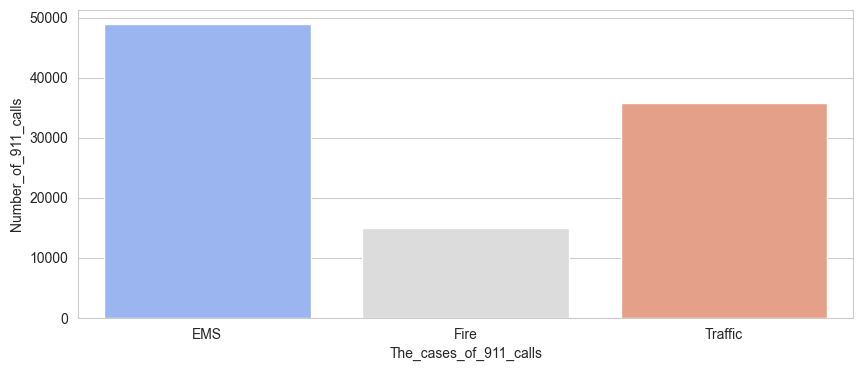

In [36]:
plt.figure(figsize=(10, 4))
sb.countplot(x='reason', data=df_copy, hue='reason', legend=False, palette='coolwarm')   # palette = viridis
plt.xlabel('The_cases_of_911_calls')
plt.ylabel('Number_of_911_calls')
plt.show()

##### Feature Engineering on `timeStamp` column

###### Check the data type for entries in the `timeStamp` column

In [37]:
df_copy[['timeStamp']].head(2)

,timeStamp
0,2015-12-10 17:40:00
1,2015-12-10 17:40:00


In [38]:
df_copy['timeStamp'].head(2)

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
Name: timeStamp, dtype: object

In [39]:
type(df_copy['timeStamp'])

pandas.core.series.Series

In [40]:
type(df_copy[['timeStamp']])

pandas.core.frame.DataFrame

In [41]:
type(df_copy['timeStamp'].iloc[0])

str

The data type for the `timeStamp` is string `str` data type and we need to convert it to `datetime format`.

###### Converting `timeStamp` column to `standard time format` - from `str` to `timestamp` format

In [42]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timeStamp'])
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00


In [43]:
df_copy['timestamp'].head(2)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
Name: timestamp, dtype: datetime64[ns]

In [44]:
df_copy['timestamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [45]:
type(df_copy['timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [185]:
time = df_copy['timestamp'].iloc[0]
print(time)
print('')
print(f'The hourly reading is: {time.hour}')
print(f'The minute reading is: {time.minute}')
print(f'The seconds reading is: {time.second}')

2015-12-10 17:40:00

The hourly reading is: 17
The minute reading is: 40
The seconds reading is: 0


###### Engineered `hour, month and dayofweek` features from `timestamp` for all rows - We use the .apply(lambda) method

In [47]:
df_copy['hour'] = df_copy['timestamp'].apply(lambda row: row.hour)
df_copy['dayofweek'] = df_copy['timestamp'].apply(lambda row: row.dayofweek)
df_copy['month'] = df_copy['timestamp'].apply(lambda row: row.month)
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12


In [48]:
print(df_copy['hour'].unique())
print(df_copy['dayofweek'].unique())
print(df_copy['month'].unique())

[17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[3 4 5 6 0 1 2]
[12  1  2  3  4  5  6  7  8]


###### Engineered names for `dayofweek and month`

In [49]:
week_dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

month_dict = {
1:'January', 2:'February',
3:'March', 4:'April',
5:'May', 6:'June',
7:'July', 8:'August',
9:'September', 10:'October',
11:'November', 12:'December'
}

In [50]:
df_copy['week_name'] = df_copy['dayofweek'].map(week_dict)
df_copy['month_name'] = df_copy['month'].map(month_dict)

In [51]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December


###### Create a countplot to see the distribution of the 911 calls for each across hours, dayofweek and month. Comment your results!

###### Hourly

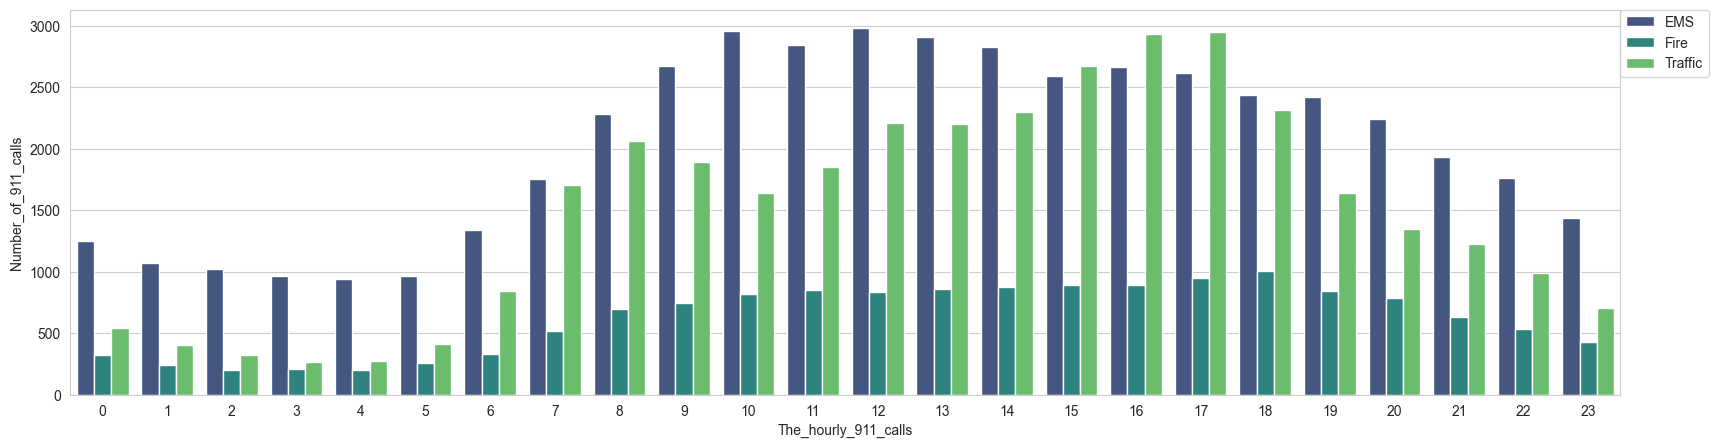

In [52]:
plt.figure(figsize=(20, 5))
sb.countplot(x='hour', data=df_copy, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('The_hourly_911_calls')
plt.ylabel('Number_of_911_calls')
plt.show()

The `EMS` calls occurs more at the 12hr00 in the afternoon and this colud as a result of many activities within this hours as many are already going about their businesses.

The 911 calls for `Traffic` occurs between the hour 16hr00 - 17hr00 and this could be attributed to influx at this time, as many people will be returning home from the close of activities.

The 911 calls for `Fire` occurs more at the 18hr00 in the evening.

###### dayofweek - weekly

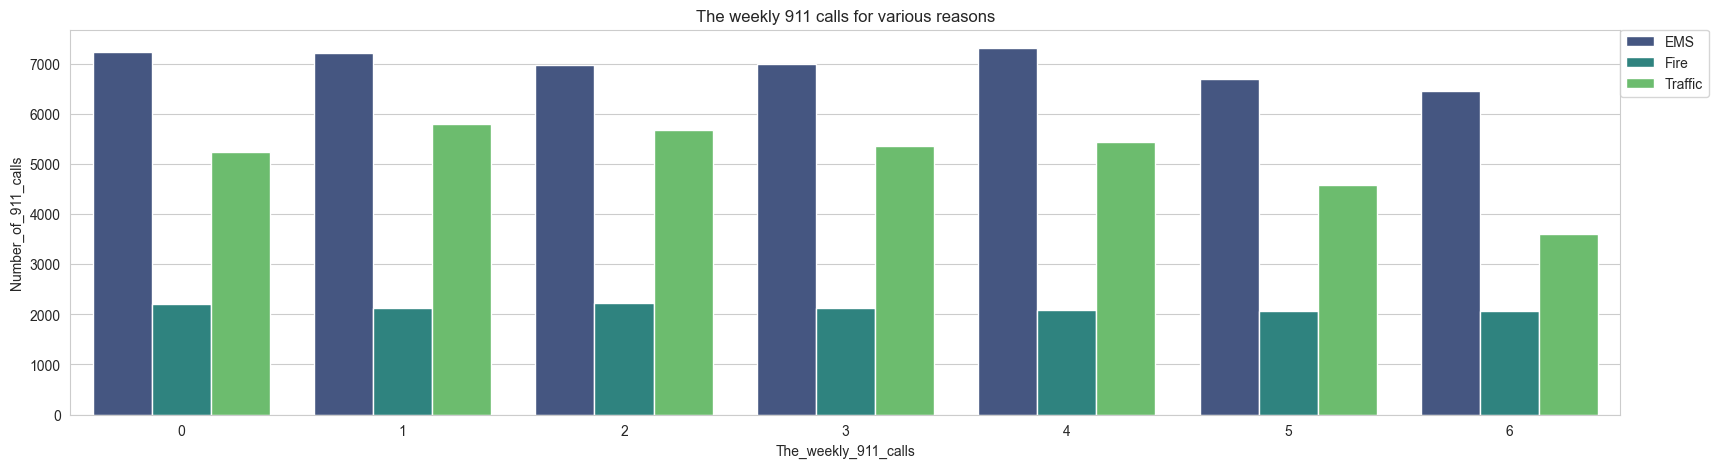

In [187]:
plt.figure(figsize=(20, 5))
sb.countplot(x='dayofweek', data=df_copy, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('The_weekly_911_calls')
plt.ylabel('Number_of_911_calls')
plt.title('The weekly 911 calls for various reasons')
plt.show()

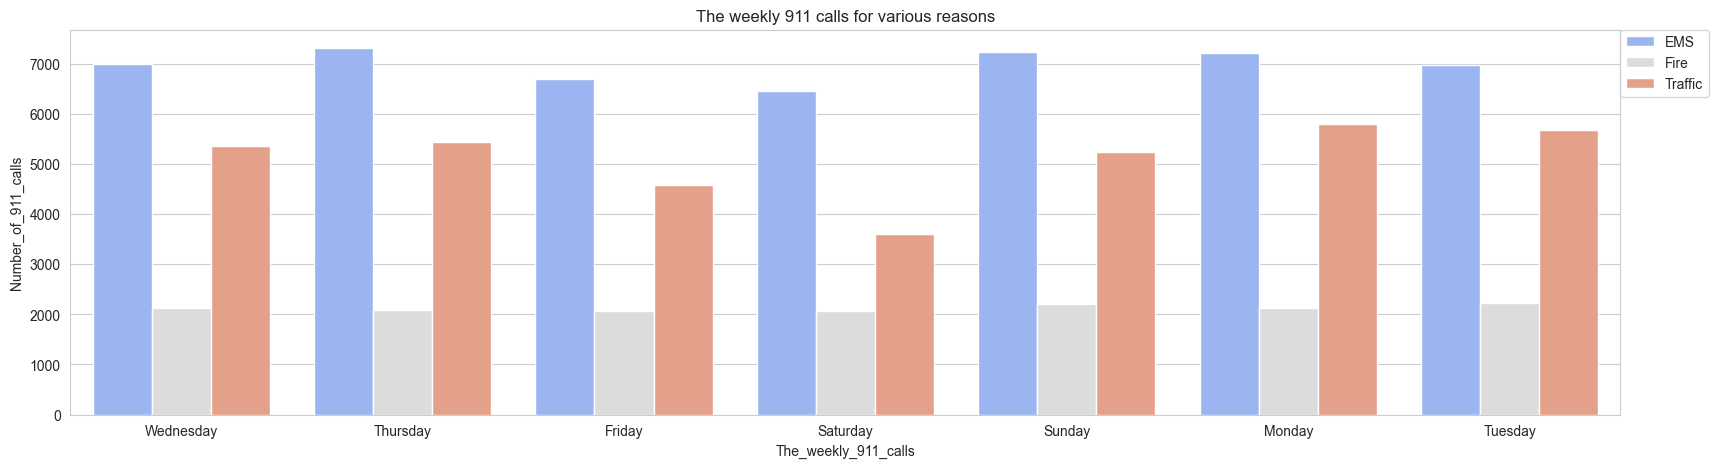

In [53]:
plt.figure(figsize=(20, 5))
sb.countplot(x='week_name', data=df_copy, hue='reason', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('The_weekly_911_calls')
plt.ylabel('Number_of_911_calls')
plt.title('The weekly 911 calls for various reasons')
plt.show()

###### monthly

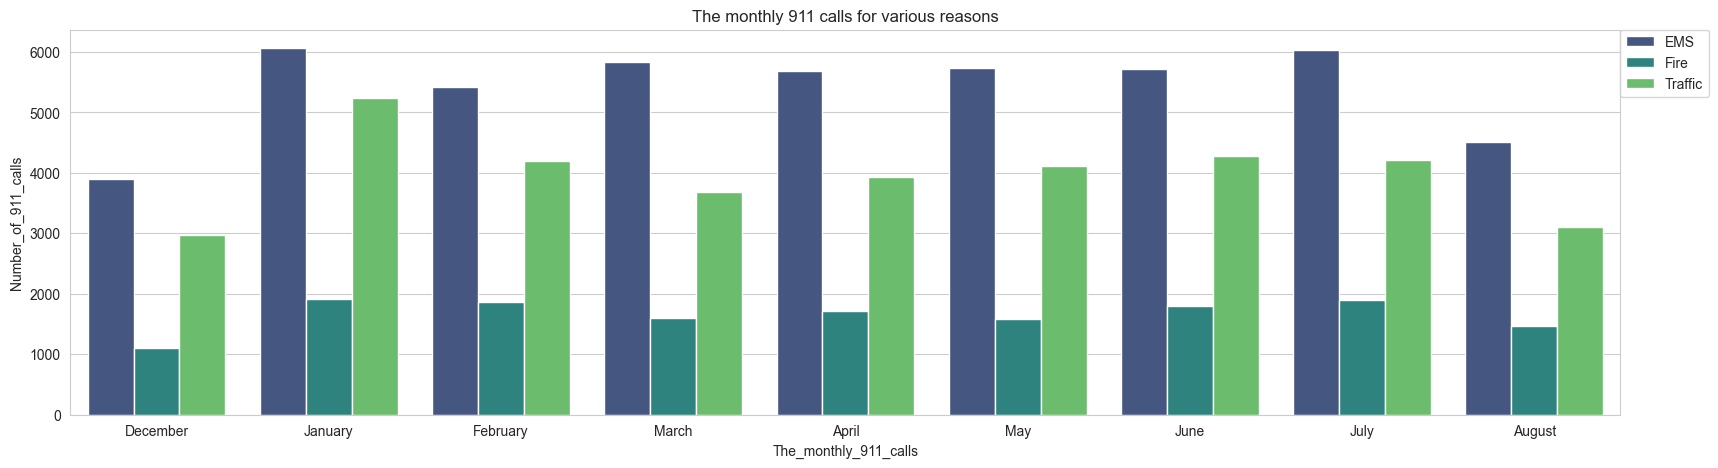

In [54]:
plt.figure(figsize=(20, 5))
sb.countplot(x='month_name', data=df_copy, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('The_monthly_911_calls')
plt.ylabel('Number_of_911_calls')
plt.title('The monthly 911 calls for various reasons')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.show()

From the plots, we can deduce that more `EMS` calls always come on a `Thursday`. More `Traffic` calls happens on a `Monday` and with `Fire` incident call averagely on each day of the week with slight increase in `Tuesdays and Wednesdays`.

More `EMS` and `Traffic` calls occurs more in the month of `January` and recorded more `Fire` incident calls in `January` and `July` each year.

##### Observation and Correction
We can see that the monthly plot do not contains some months - `September, October and November`. We would fill this missing information by plotting the information in another way, possibly using a simple line plot that fills in the missing months.

We would create a `groupby` object by using the `month` column and applying the `.count()` method as aggregation.

##### The `GroupBy` Approach on EDA

In [55]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December


In [56]:
df_copy.groupby(df_copy['month_name']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name
month_name,,,,,,,,,,,,,,,
April,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
August,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
December,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
February,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
January,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
July,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
June,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
March,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
May,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423


In [57]:
grp_by_mnth = df_copy.groupby(df_copy['month_name']).count()
grp_by_mnth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name
month_name,,,,,,,,,,,,,,,
April,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
August,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
December,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
February,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
January,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205


The new groupby dataframe can now be use for further analysis. We can use other aggregate functions on groupby provided all columns are numerical.

##### Simple Plots for counts of calls per months

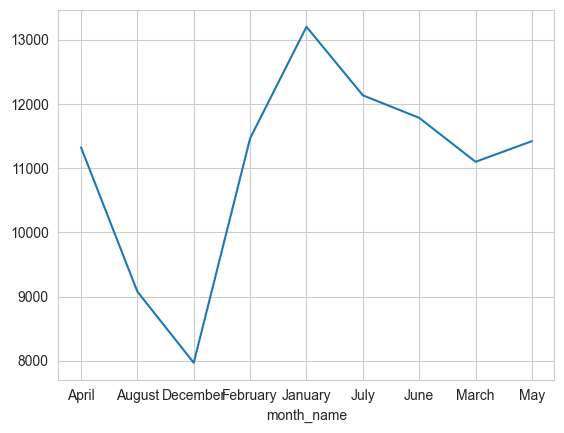

In [58]:
grp_by_mnth['twp'].plot()
plt.show()

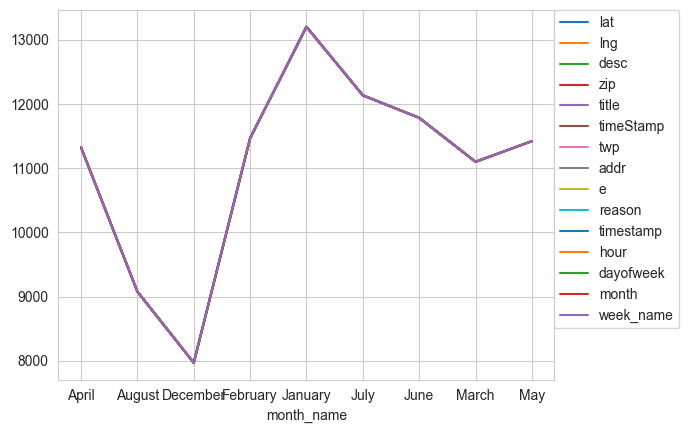

In [59]:
grp_by_mnth.plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.show()

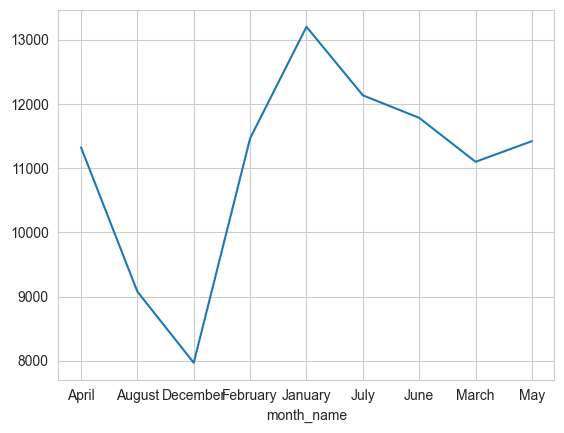

In [60]:
grp_by_mnth['zip'].plot()
plt.show()

###### We use seaborn's `lmplot()` to create a linear fit on the number of calls per month - using the `grp_by_mnth` dataframe

In [61]:
grp_by_mnth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name
month_name,,,,,,,,,,,,,,,
April,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
August,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
December,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
February,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
January,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205


###### Reset the index

In [62]:
grp_by_mnth = grp_by_mnth.reset_index(drop=True)
grp_by_mnth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name
0,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
1,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
2,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
3,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
4,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205


<Figure size 2000x1000 with 0 Axes>

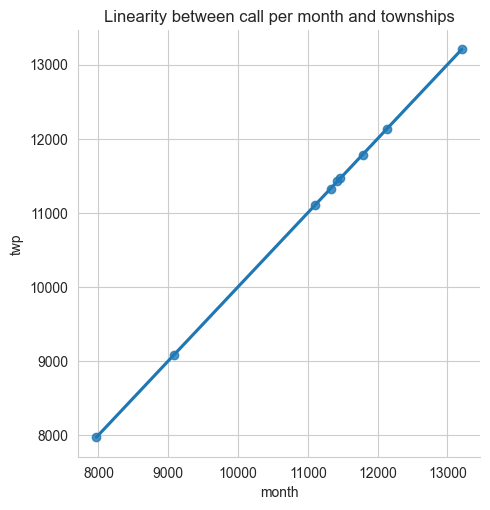

In [190]:
plt.figure(figsize=(20, 10))
sb.lmplot(x='month', y='twp', data=grp_by_mnth)
plt.title('Linearity between call per month and townships')
plt.show()

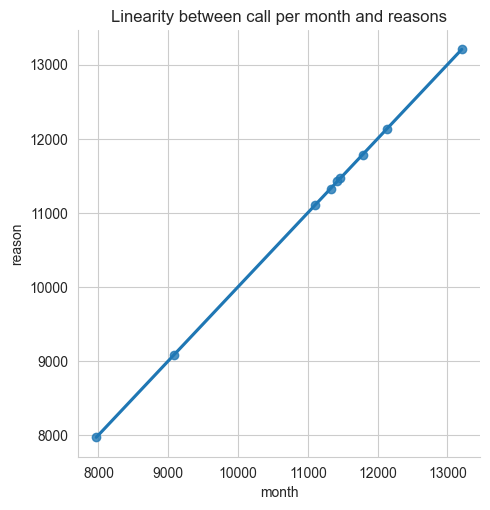

In [64]:
sb.lmplot(x='month', y='reason', data=grp_by_mnth)
plt.title('Linearity between call per month and reasons')
plt.show()

##### Engineer the `date` from `timestamp` from the df_copy dataset

In [65]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December


In [66]:
df_copy['date'] = df_copy['timestamp'].apply(lambda date:date.date())
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10


###### Groupby using `date` using aggregate `.count()` method and plot the relationship with other columns

In [67]:
grp_by_date = df_copy.groupby(df_copy['date']).count()
grp_by_date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name
date,,,,,,,,,,,,,,,,
2015-12-10,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
2015-12-11,396,396,396,396,396,396,396,396,396,396,396,396,396,396,396,396
2015-12-12,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
2015-12-13,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
2015-12-14,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447


<Figure size 2000x500 with 0 Axes>

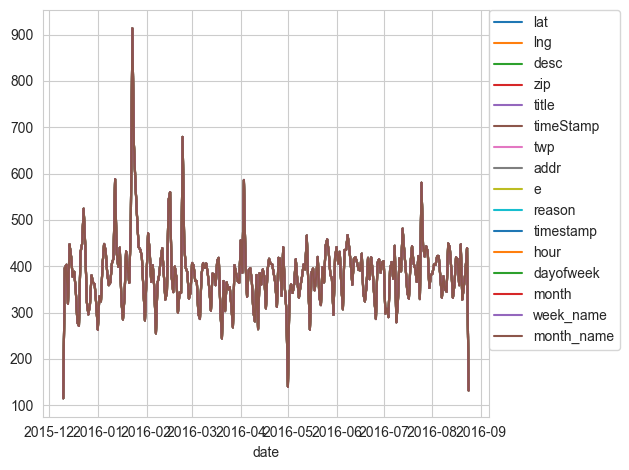

In [68]:
plt.figure(figsize=(20, 5))
grp_by_date.plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.show()

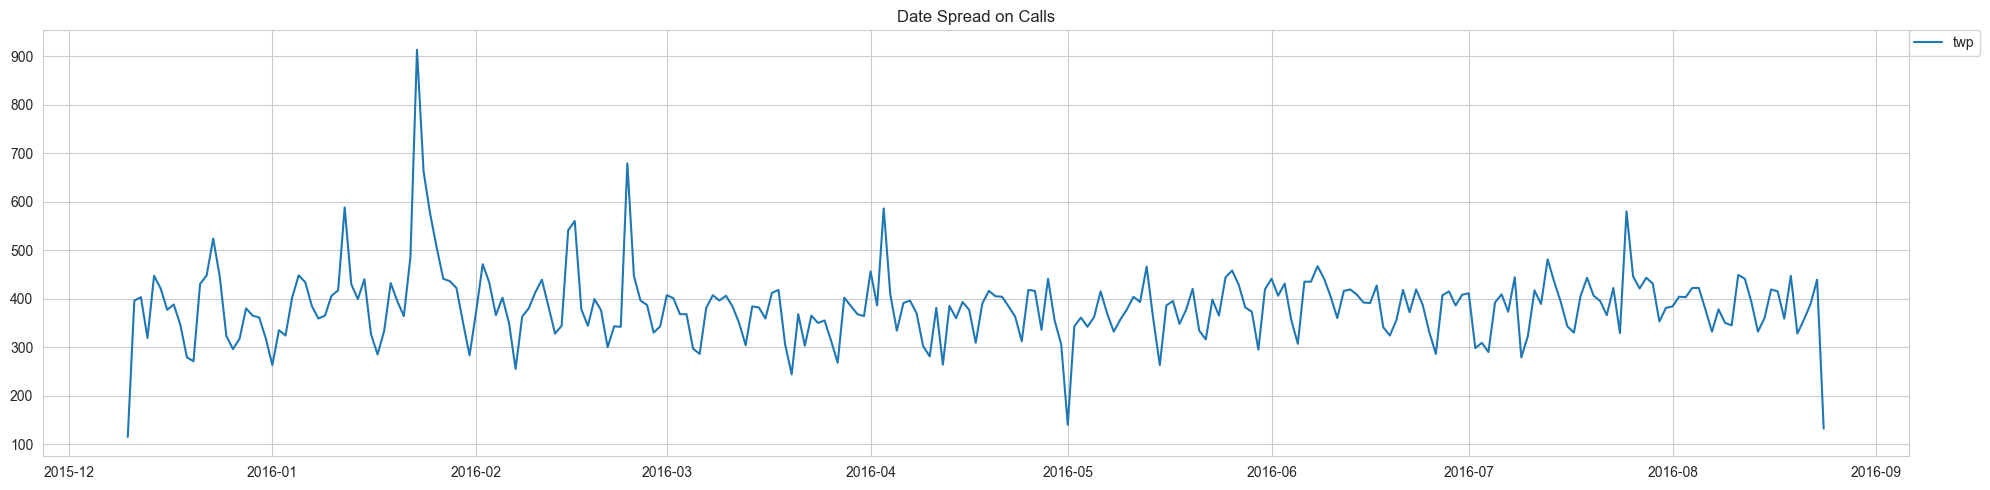

In [196]:
plt.figure(figsize=(20, 5))
plt.plot('twp', data=grp_by_date)
#plt.plot(grp_by_date['twp'])
#grp_by_date['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

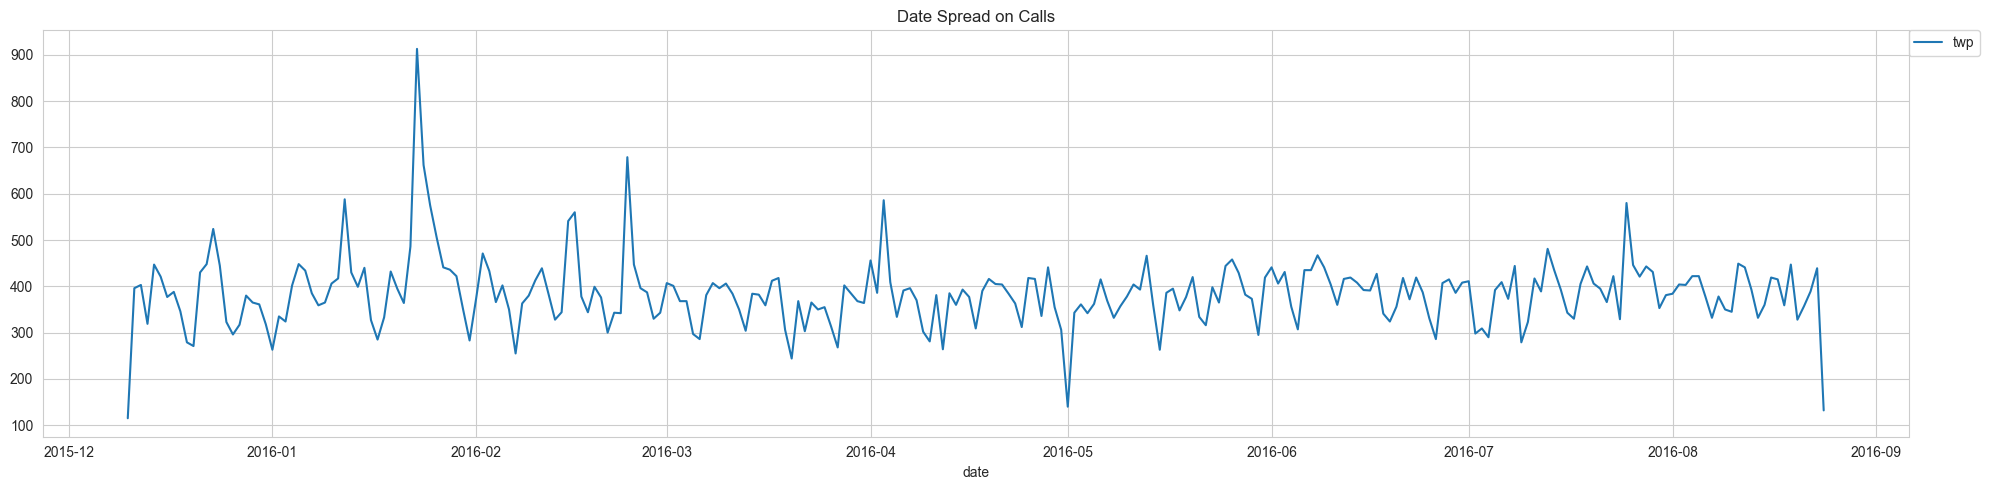

In [69]:
plt.figure(figsize=(20, 5))
grp_by_date['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

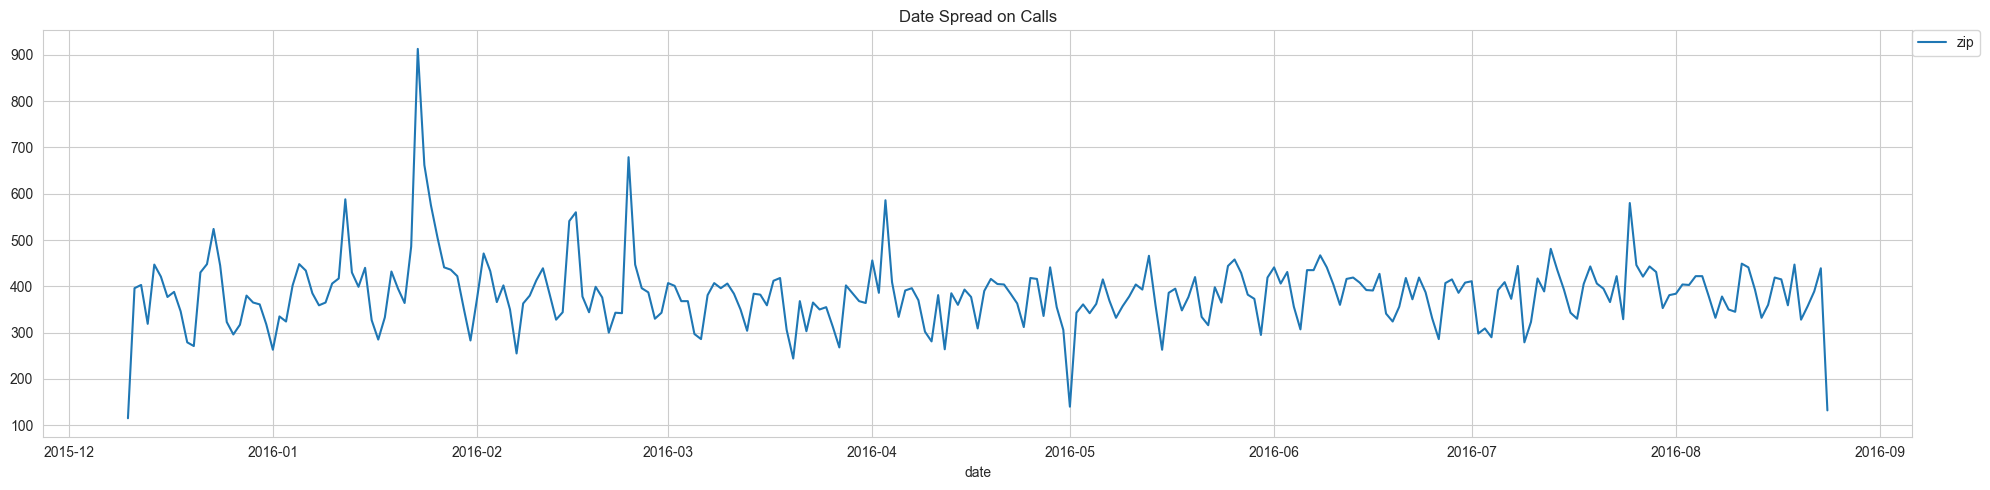

In [70]:
plt.figure(figsize=(20, 5))
grp_by_date['zip'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

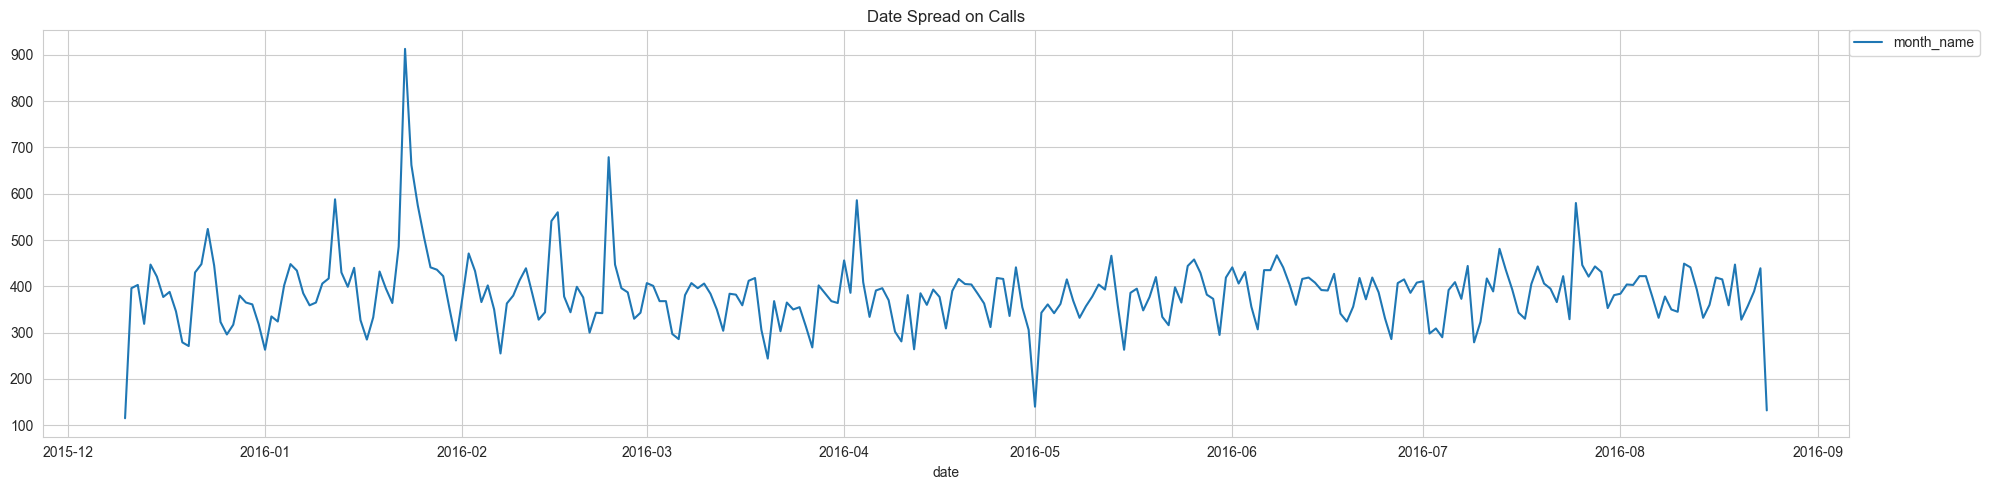

In [71]:
plt.figure(figsize=(20, 5))
grp_by_date['month_name'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

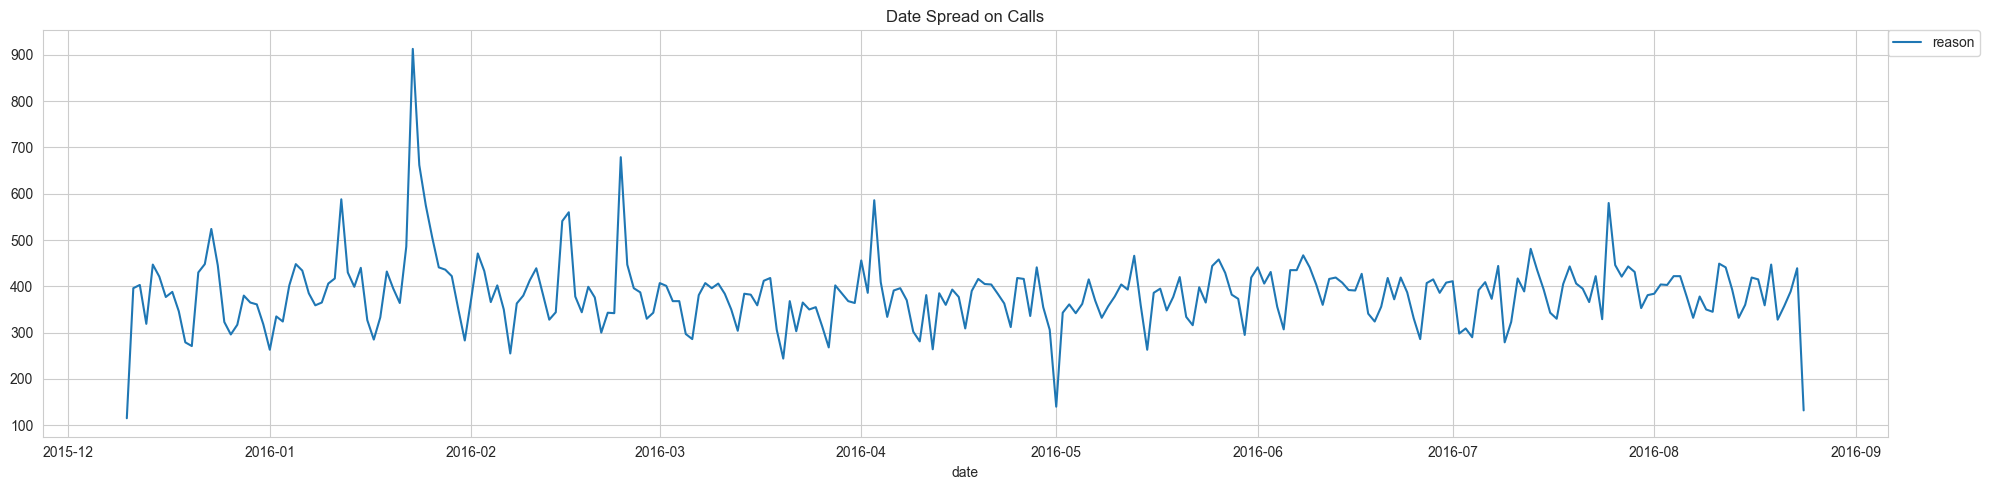

In [72]:
plt.figure(figsize=(20, 5))
grp_by_date['reason'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

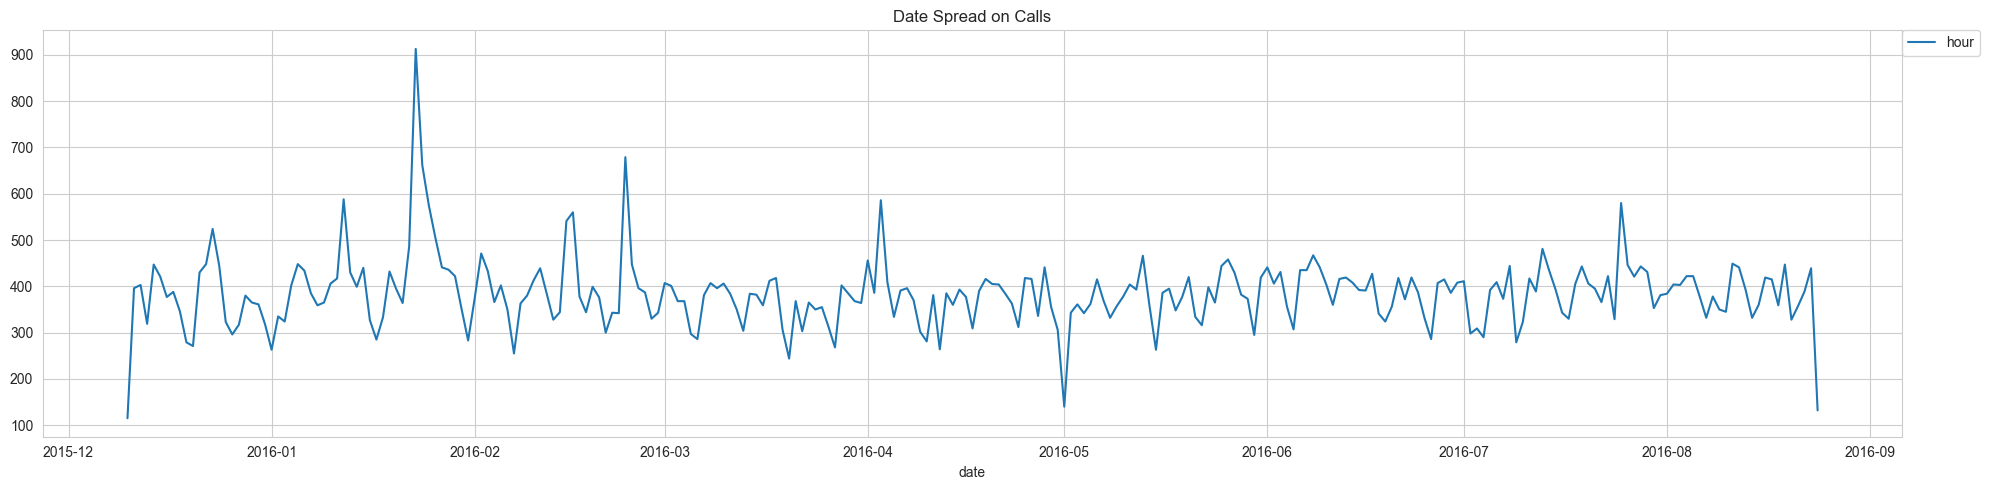

In [73]:
plt.figure(figsize=(20, 5))
grp_by_date['hour'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

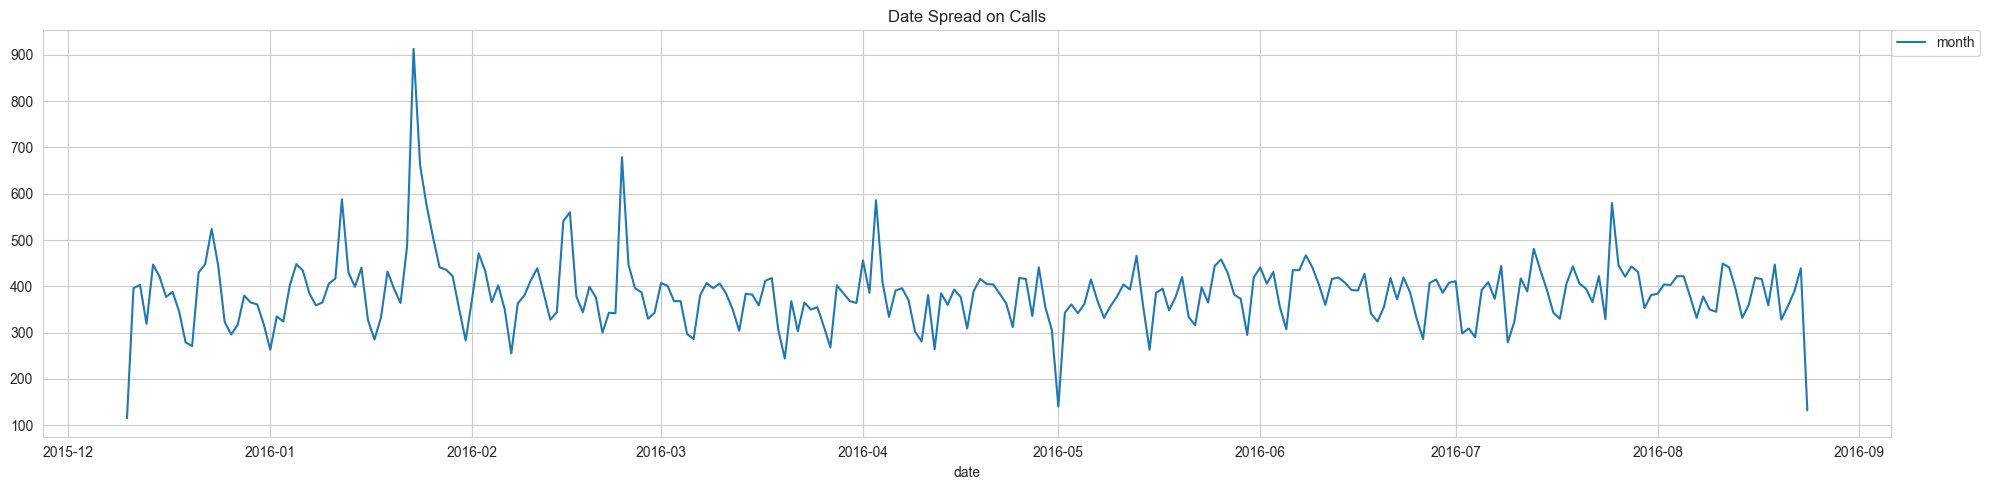

In [74]:
plt.figure(figsize=(20, 5))
grp_by_date['month'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

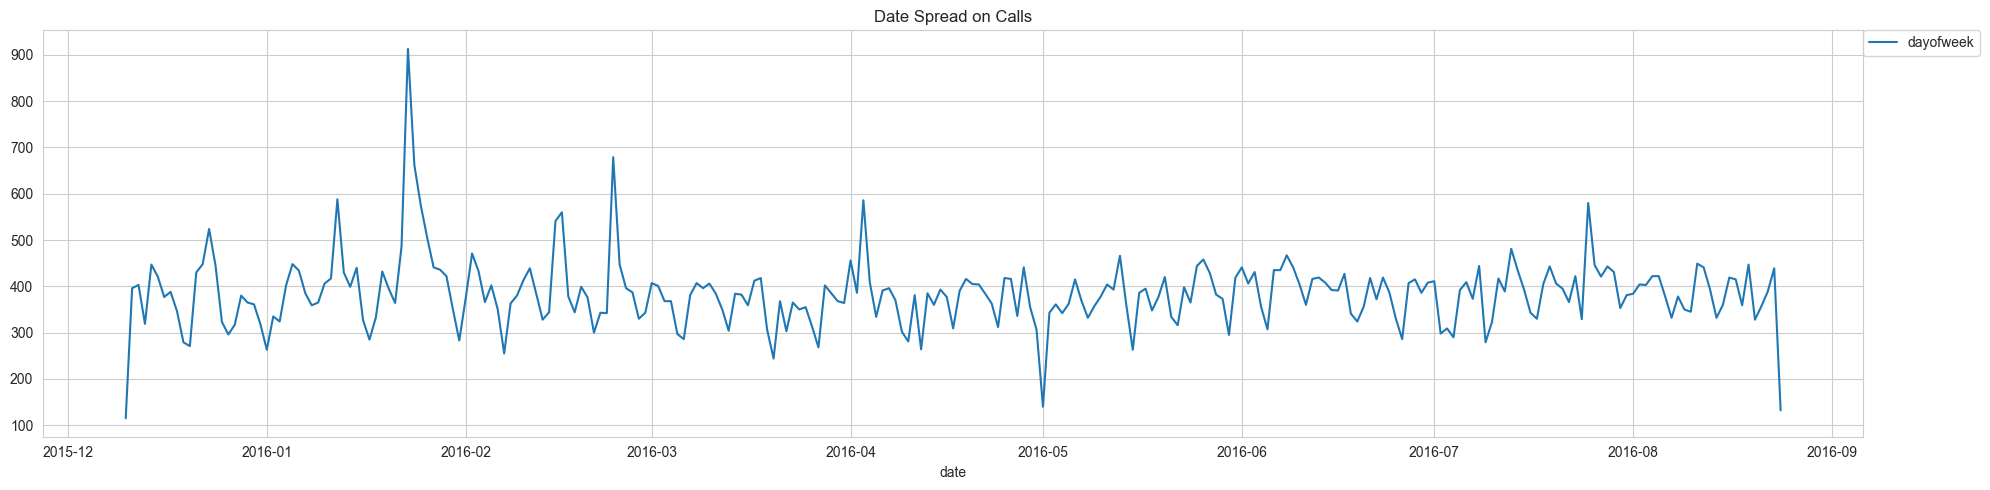

In [75]:
plt.figure(figsize=(20, 5))
grp_by_date['dayofweek'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Date Spread on Calls')
plt.tight_layout()
plt.show()

###### Plot showing where `reason` equals to `items of the reason` groupby `date`
We are grouping by date and only considering each labels on the reason column

In [76]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10


##### The spread of calls across the dates with focus on any columns to study the effect of the callls on those columns

<Axes: xlabel='date'>

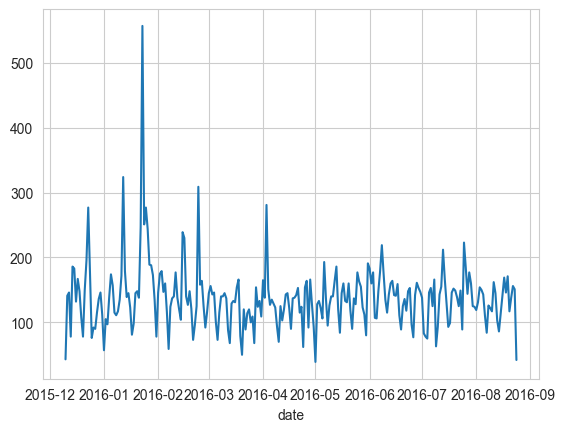

In [77]:
df_copy[df_copy['reason'] == 'Traffic'].groupby(df_copy['date']).count()['twp'].plot()

###### All calls due to traffic grouping by the dates

In [78]:
reason_traffic = df_copy[df_copy['reason'] == 'Traffic'].groupby(df_copy['date']).count()
reason_traffic.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
date,,,,,,,,,,,,,,,,,
2015-12-10,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
2015-12-11,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
2015-12-12,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
2015-12-13,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
2015-12-14,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186


In [79]:
reason_traffic['twp']

date
2015-12-10     43
2015-12-11    141
2015-12-12    146
2015-12-13     78
2015-12-14    186
             ... 
2016-08-20    117
2016-08-21    138
2016-08-22    156
2016-08-23    151
2016-08-24     42
Name: twp, Length: 259, dtype: int64

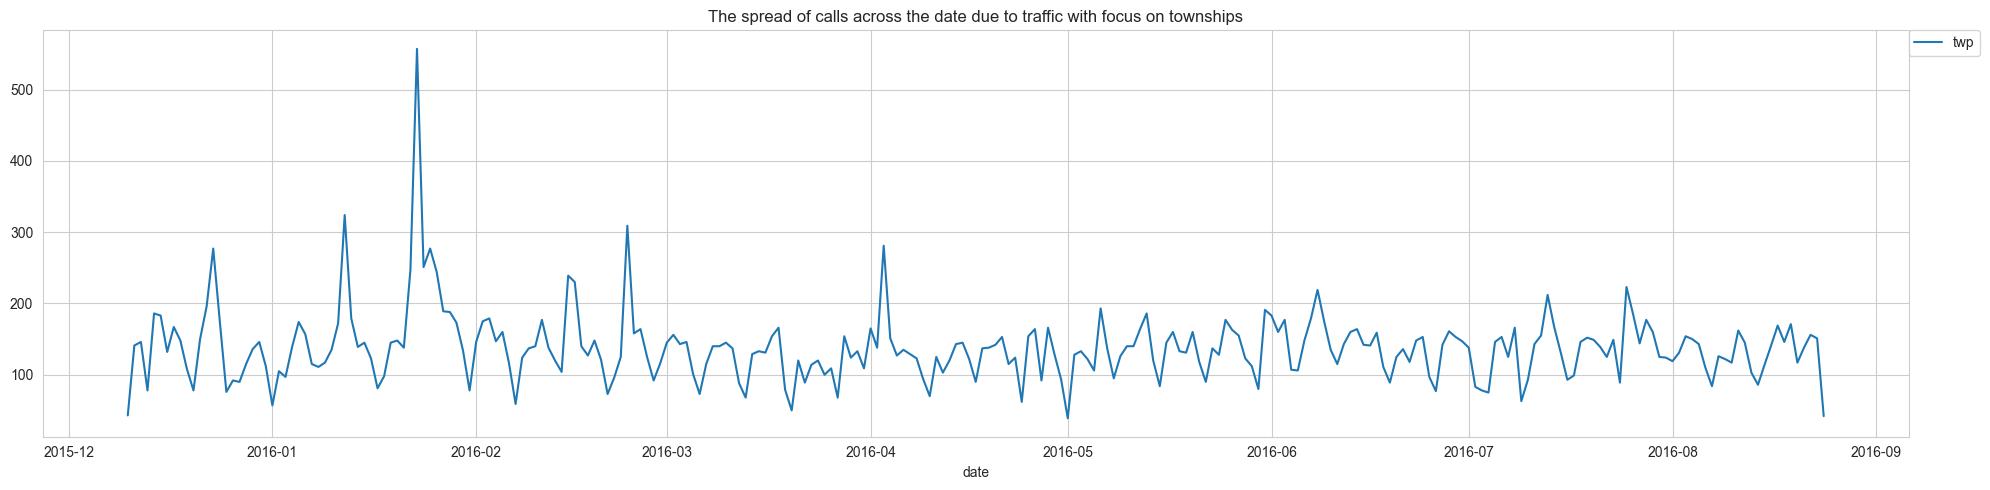

In [80]:
plt.figure(figsize=(20, 5))
reason_traffic['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('The spread of calls across the date due to traffic with focus on townships')
plt.tight_layout()
plt.show()

###### All calls due to fire grouping by the dates

In [81]:
reason_fire = df_copy[df_copy['reason'] == 'Fire'].groupby(df_copy['date']).count()
reason_fire.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
date,,,,,,,,,,,,,,,,,
2015-12-10,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
2015-12-12,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39


In [82]:
reason_fire['twp']

date
2015-12-10    15
2015-12-11    69
2015-12-12    68
2015-12-13    51
2015-12-14    39
              ..
2016-08-20    52
2016-08-21    54
2016-08-22    51
2016-08-23    70
2016-08-24    19
Name: twp, Length: 259, dtype: int64

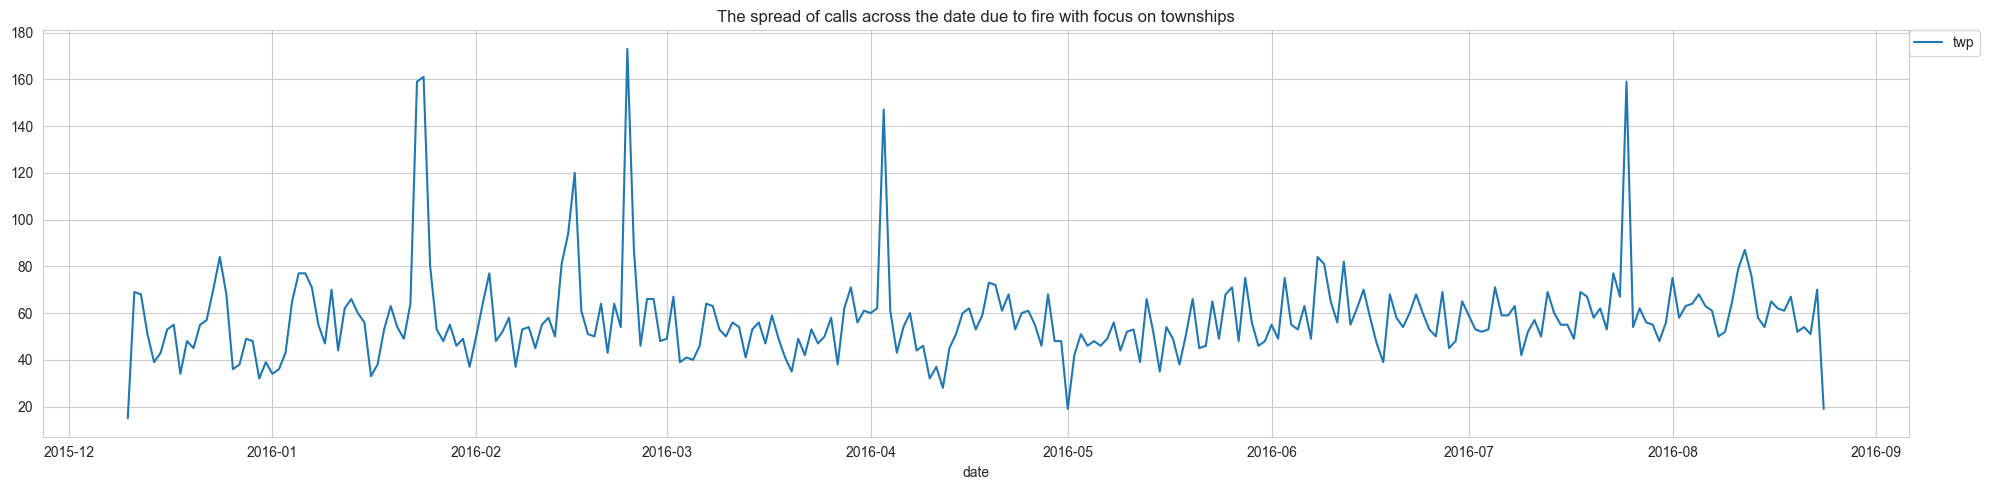

In [83]:
plt.figure(figsize=(20, 5))
reason_fire['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('The spread of calls across the date due to fire with focus on townships')
plt.tight_layout()
plt.show()

###### All calls due to ems grouping by the dates

In [84]:
reason_ems = df_copy[df_copy['reason'] == 'EMS'].groupby(df_copy['date']).count()
reason_ems.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
date,,,,,,,,,,,,,,,,,
2015-12-10,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222


In [85]:
reason_ems['twp']

date
2015-12-10     57
2015-12-11    186
2015-12-12    189
2015-12-13    190
2015-12-14    222
             ... 
2016-08-20    159
2016-08-21    165
2016-08-22    182
2016-08-23    218
2016-08-24     71
Name: twp, Length: 259, dtype: int64

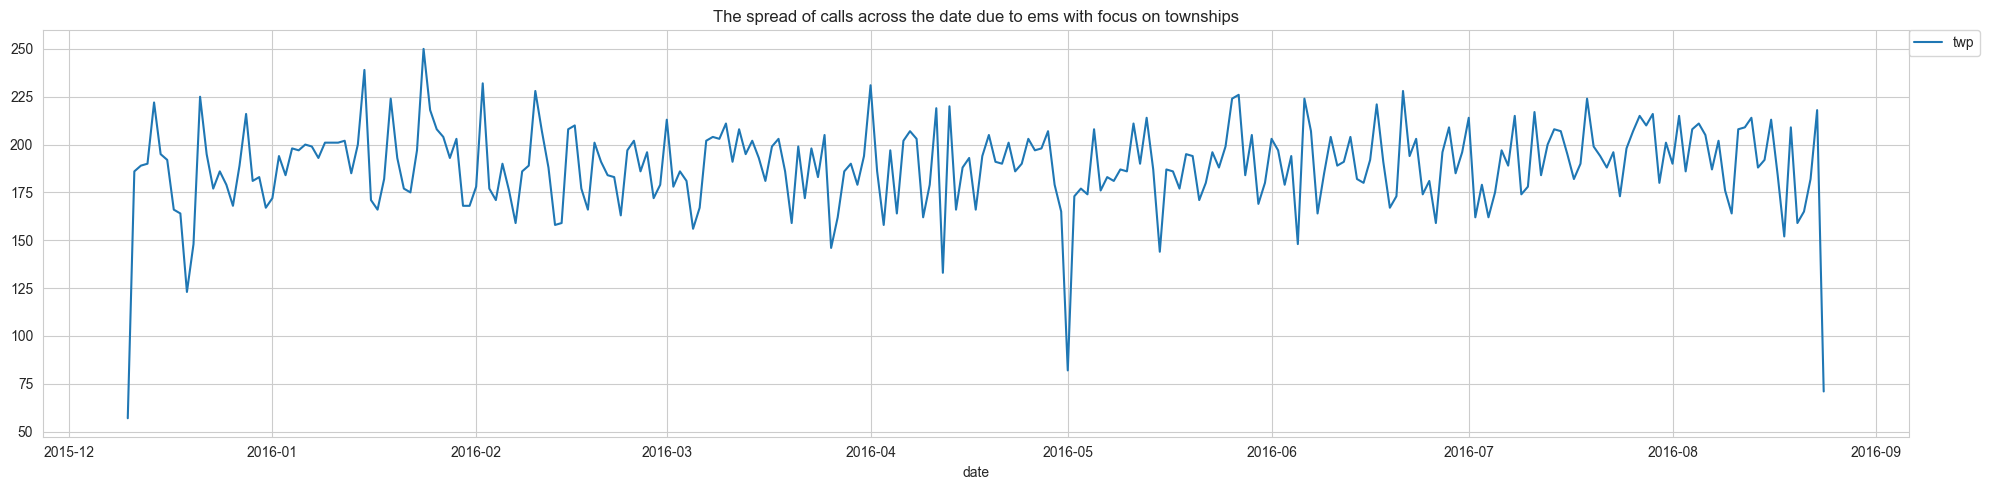

In [86]:
plt.figure(figsize=(20, 5))
reason_ems['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('The spread of calls across the date due to ems with focus on townships')
plt.tight_layout()
plt.show()

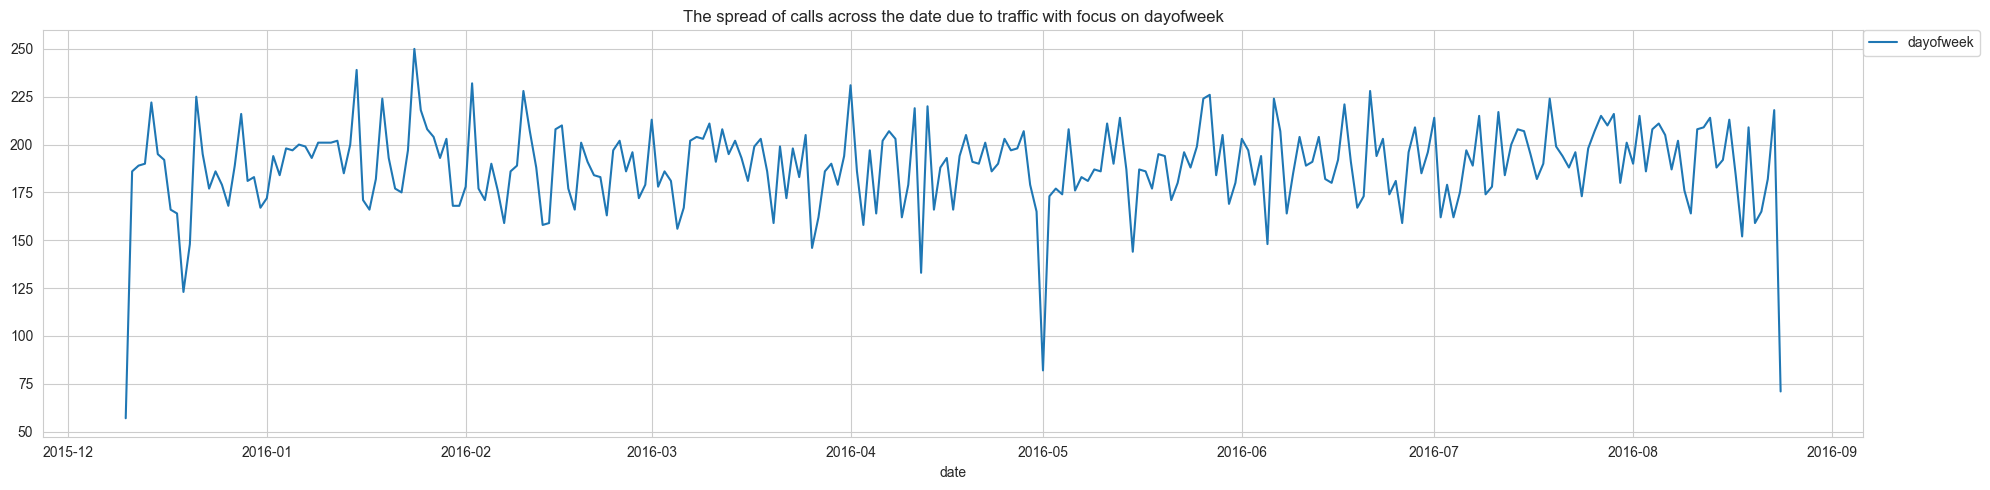

In [87]:
plt.figure(figsize=(20, 5))
reason_ems['dayofweek'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('The spread of calls across the date due to traffic with focus on dayofweek')
plt.tight_layout()
plt.show()

##### Creating heatmaps with seaborn using the `df_copy` dataset

*Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the `hours` and the Index becomes the `dayofweek`. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.*

In [88]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10


In [89]:
df_copy.groupby(by=['dayofweek', 'hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
dayofweek hour                                                                  
0         0     282  282   282  282    282        282  282   282  282     282   
          1     221  221   221  221    221        221  221   221  221     221   
          2     201  201   201  201    201        201  201   201  201     201   
          3     194  194   194  194    194        194  194   194  194     194   
          4     204  204   204  204    204        204  204   204  204     204   
...             ...  ...   ...  ...    ...        ...  ...   ...  ...     ...   
6         19    655  655   655  655    655        655  655   655  655     655   
          20    537  537   537  537    537        537  537   537  537     537   
          21    461  461   461  461    461        461  461   461  461     461   
          22    415  415   415  415    415        415  415   415  415     415   
          23    330  330   330  330    330        330  330   330  330     330   

                timestamp  month  week_name  month_name  date  
dayofweek hour                                                 
0         0           282    282        282         282   282  
          1           221    221        221         221   221  
          2           201    201        201         201   201  
          3           194    194        194         194   194  
          4           204    204        204         204   204  
...                   ...    ...        ...         ...   ...  
6         19          655    655        655         655   655  
          20          537    537        537         537   537  
          21          461    461        461         461   461  
          22          415    415        415         415   415  
          23          330    330        330         330   330  

[168 rows x 15 columns]

In [90]:
grp_day_hr = df_copy.groupby(by=['dayofweek', 'hour']).count()
grp_day_hr.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
dayofweek hour                                                                  
0         0     282  282   282  282    282        282  282   282  282     282   
          1     221  221   221  221    221        221  221   221  221     221   
          2     201  201   201  201    201        201  201   201  201     201   
          3     194  194   194  194    194        194  194   194  194     194   
          4     204  204   204  204    204        204  204   204  204     204   

                timestamp  month  week_name  month_name  date  
dayofweek hour                                                 
0         0           282    282        282         282   282  
          1           221    221        221         221   221  
          2           201    201        201         201   201  
          3           194    194        194         194   194  
          4           204    204        204         204   204

###### Select any column and use the unstack

In [91]:
grp_day_hr_reason = grp_day_hr['reason'].unstack()
grp_day_hr_reason

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


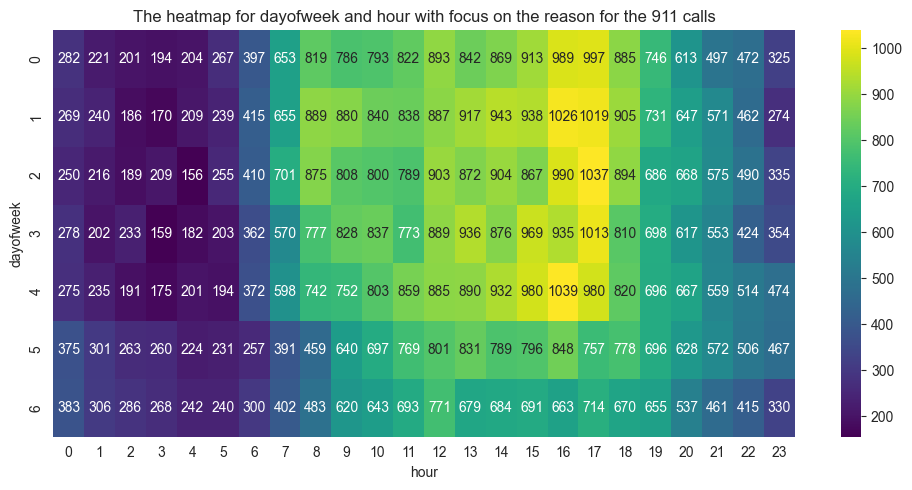

In [236]:
plt.figure(figsize=(10, 5))
sb.heatmap(grp_day_hr_reason, annot=True, fmt='d', cmap='viridis')
plt.title('The heatmap for dayofweek and hour with focus on the reason for the 911 calls')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

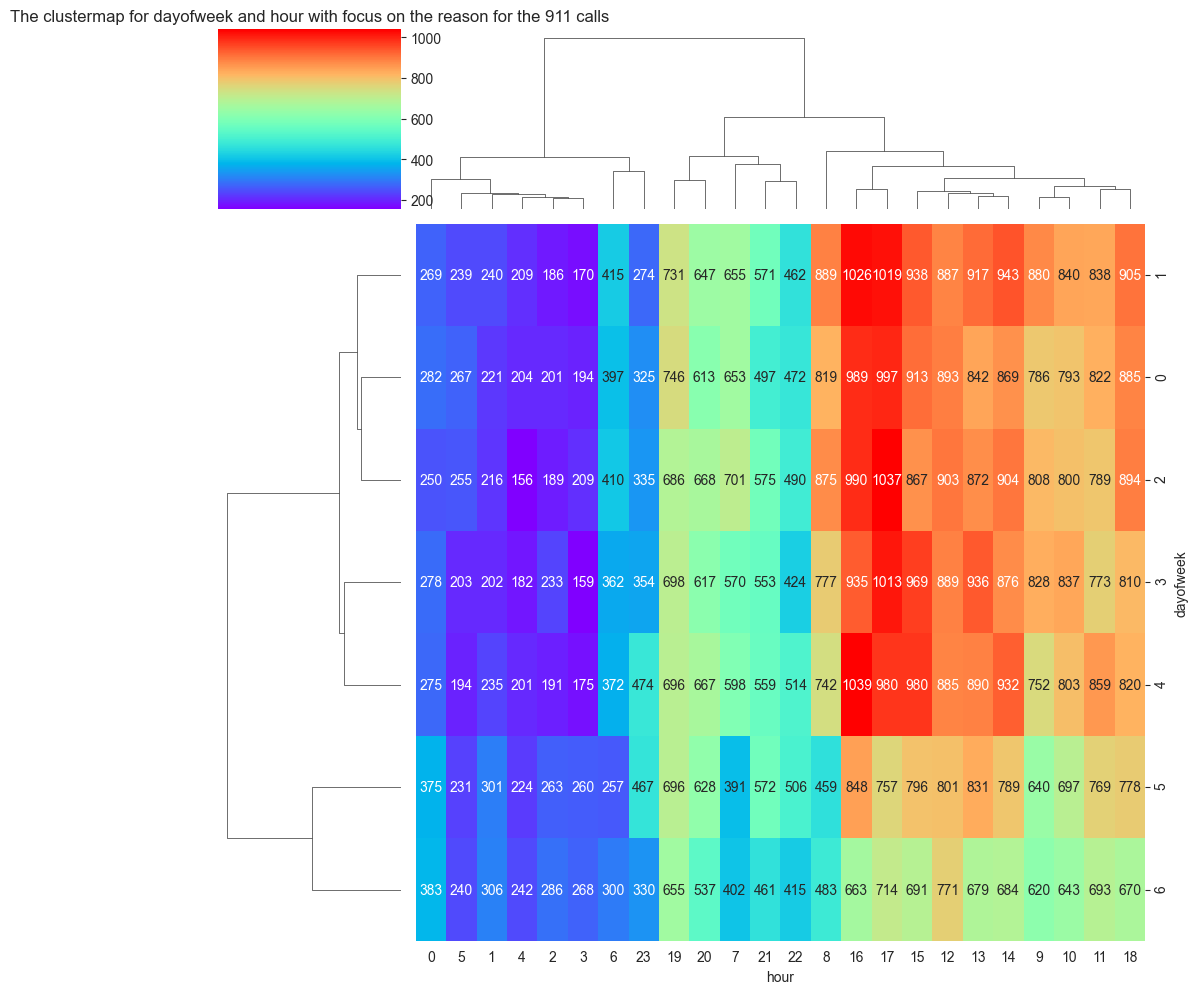

In [238]:
plt.figure(figsize=(10, 5))
sb.clustermap(grp_day_hr_reason, annot=True, fmt='d', cmap='rainbow')
plt.title('The clustermap for dayofweek and hour with focus on the reason for the 911 calls')
plt.tight_layout()
plt.show()

In [94]:
grp_day_hr_twp = grp_day_hr['twp'].unstack()
grp_day_hr_twp

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


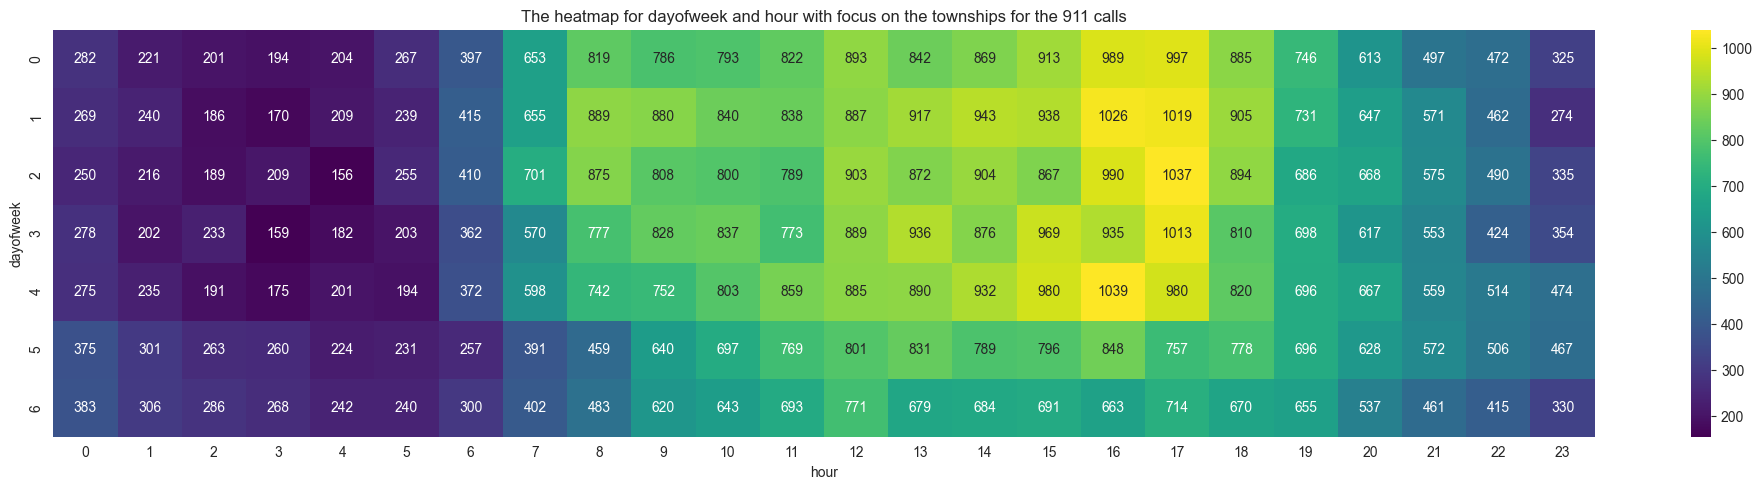

In [234]:
plt.figure(figsize=(20, 5))
sb.heatmap(grp_day_hr_twp, annot=True, fmt='d', cmap='viridis')
plt.title('The heatmap for dayofweek and hour with focus on the townships for the 911 calls')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

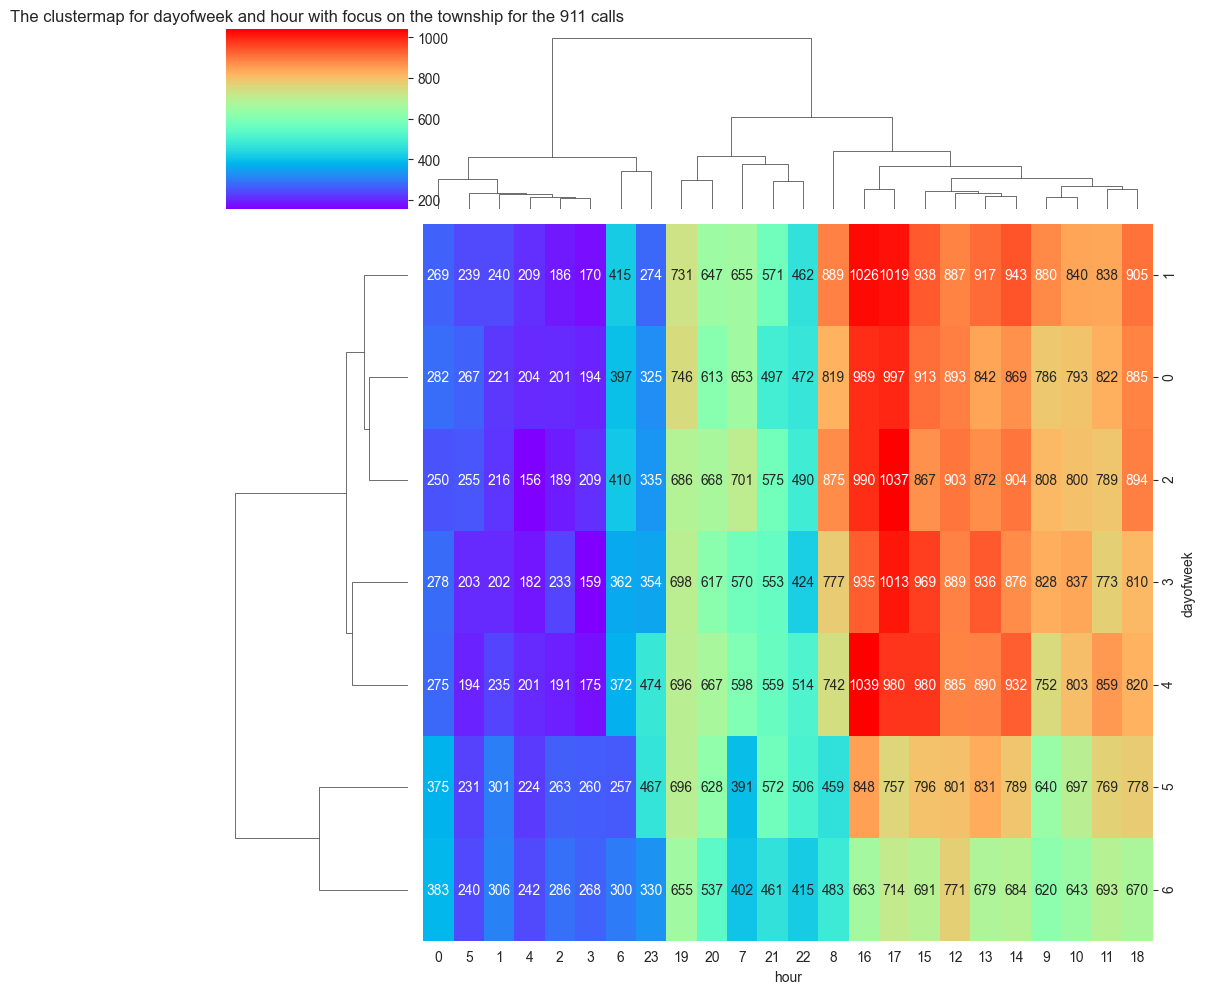

In [240]:
plt.figure(figsize=(10, 6))
sb.clustermap(grp_day_hr_twp, annot=True, fmt='d', cmap='rainbow')
plt.title('The clustermap for dayofweek and hour with focus on the township for the 911 calls')
plt.tight_layout()
plt.show()

#### Let create more heatmap and clustermap using `dayofweek` as row and `month` as column

In [97]:
df_copy.groupby(by=['dayofweek', 'month']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
dayofweek month                                                               
0         1      1727  1727  1727  1727   1727       1727  1727  1727  1727   
          2      1964  1964  1964  1964   1964       1964  1964  1964  1964   
          3      1535  1535  1535  1535   1535       1535  1535  1535  1535   
          4      1598  1598  1598  1598   1598       1598  1598  1598  1598   
          5      1779  1779  1779  1779   1779       1779  1779  1779  1779   
...               ...   ...   ...   ...    ...        ...   ...   ...   ...   
6         5      1424  1424  1424  1424   1424       1424  1424  1424  1424   
          6      1333  1333  1333  1333   1333       1333  1333  1333  1333   
          7      1672  1672  1672  1672   1672       1672  1672  1672  1672   
          8      1021  1021  1021  1021   1021       1021  1021  1021  1021   
          12      907   907   907   907    907        907   907   907   907   

                 reason  timestamp  hour  week_name  month_name  date  
dayofweek month                                                        
0         1        1727       1727  1727       1727        1727  1727  
          2        1964       1964  1964       1964        1964  1964  
          3        1535       1535  1535       1535        1535  1535  
          4        1598       1598  1598       1598        1598  1598  
          5        1779       1779  1779       1779        1779  1779  
...                 ...        ...   ...        ...         ...   ...  
6         5        1424       1424  1424       1424        1424  1424  
          6        1333       1333  1333       1333        1333  1333  
          7        1672       1672  1672       1672        1672  1672  
          8        1021       1021  1021       1021        1021  1021  
          12        907        907   907        907         907   907  

[63 rows x 15 columns]

In [98]:
grp_day_month = df_copy.groupby(by=['dayofweek', 'month']).count()
grp_day_month.head()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
dayofweek month                                                               
0         1      1727  1727  1727  1727   1727       1727  1727  1727  1727   
          2      1964  1964  1964  1964   1964       1964  1964  1964  1964   
          3      1535  1535  1535  1535   1535       1535  1535  1535  1535   
          4      1598  1598  1598  1598   1598       1598  1598  1598  1598   
          5      1779  1779  1779  1779   1779       1779  1779  1779  1779   

                 reason  timestamp  hour  week_name  month_name  date  
dayofweek month                                                        
0         1        1727       1727  1727       1727        1727  1727  
          2        1964       1964  1964       1964        1964  1964  
          3        1535       1535  1535       1535        1535  1535  
          4        1598       1598  1598       1598        1598  1598  
          5        1779       1779  1779       1779        1779  1779

###### Select any column and unstack them

In [99]:
grp_day_month_reason = grp_day_month['reason'].unstack()
grp_day_month_reason

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065
5,2291,1441,1266,1734,1444,1388,1695,1099,978
6,1960,1229,1102,1488,1424,1333,1672,1021,907


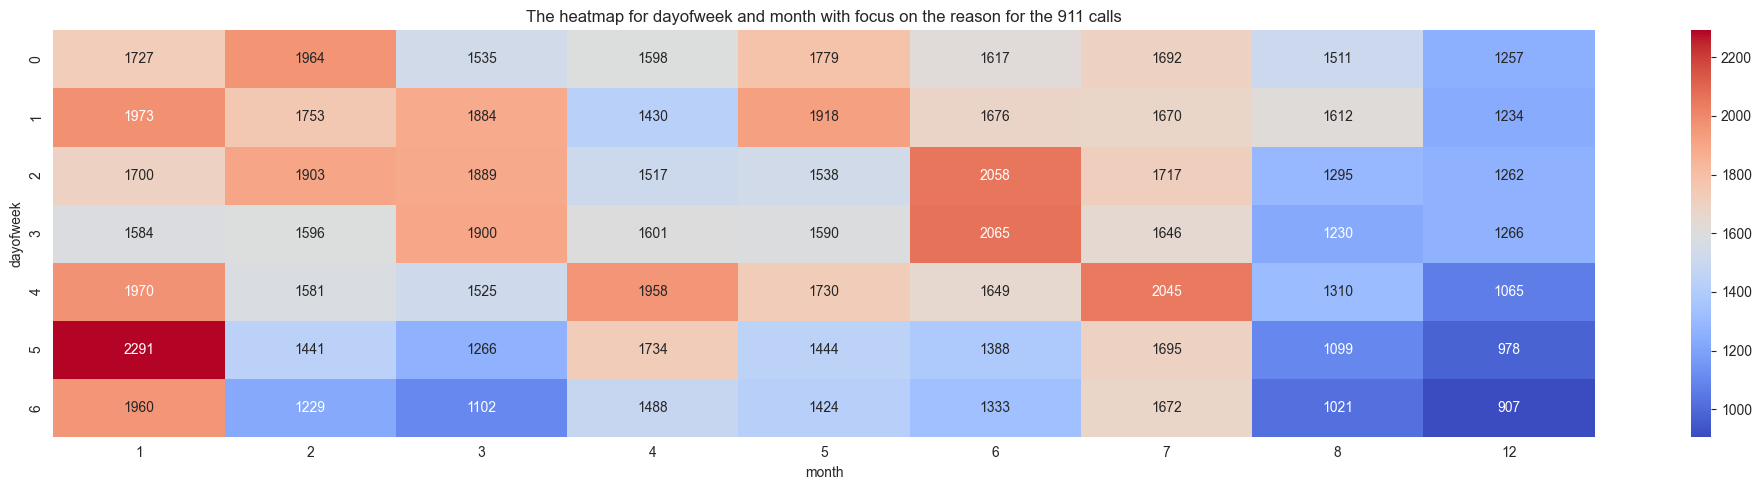

In [233]:
plt.figure(figsize=(20, 5))
sb.heatmap(grp_day_month_reason, annot=True, fmt='d', cmap='coolwarm')
plt.title('The heatmap for dayofweek and month with focus on the reason for the 911 calls')
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

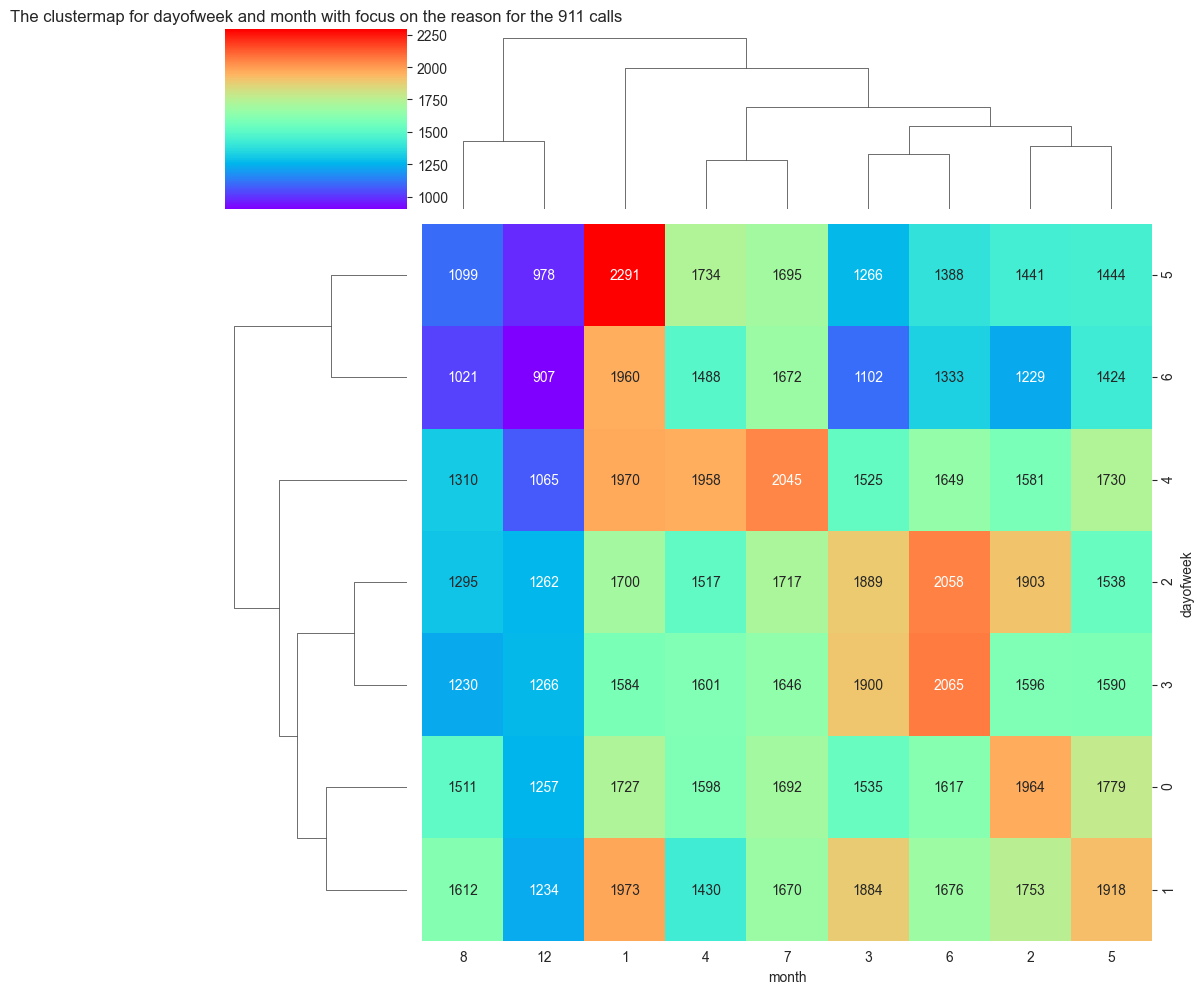

In [241]:
plt.figure(figsize=(20, 5))
sb.clustermap(grp_day_month_reason, annot=True, fmt='d', cmap='rainbow')
plt.title('The clustermap for dayofweek and month with focus on the reason for the 911 calls')
plt.tight_layout()
plt.show()

###### Engineering More Features

In [103]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,3,12,Wednesday,December,2015-12-10


##### Let us engineer four more features - `year` , `second`, `minute` and `day` from either `timestamp` or `date`

In [104]:
print(f'timestamp type is: {type(df_copy['timestamp'].iloc[0])}')
print(f'date type is: {type(df_copy['date'].iloc[0])}')
print('They are both in standard format.')

timestamp type is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
date type is: <class 'datetime.date'>
They are both in standard format.


In [105]:
df_copy['year'] = df_copy['timestamp'].apply(lambda year: year.year)
df_copy['day'] = df_copy['timestamp'].apply(lambda day: day.day)
df_copy['minutes'] = df_copy['timestamp'].apply(lambda min: min.minute)
df_copy['second'] = df_copy['timestamp'].apply(lambda sec: sec.second)

In [106]:
df_copy.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,...,hour,dayofweek,month,week_name,month_name,date,year,day,minutes,second
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,...,17,3,12,Wednesday,December,2015-12-10,2015,10,40,0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,...,17,3,12,Wednesday,December,2015-12-10,2015,10,40,0


In [107]:
grp_by_day = df_copy.groupby(df_copy['day']).count()
grp_by_day.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date,year,minutes,second
day,,,,,,,,,,,,,,,,,,,,
1,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876
2,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044


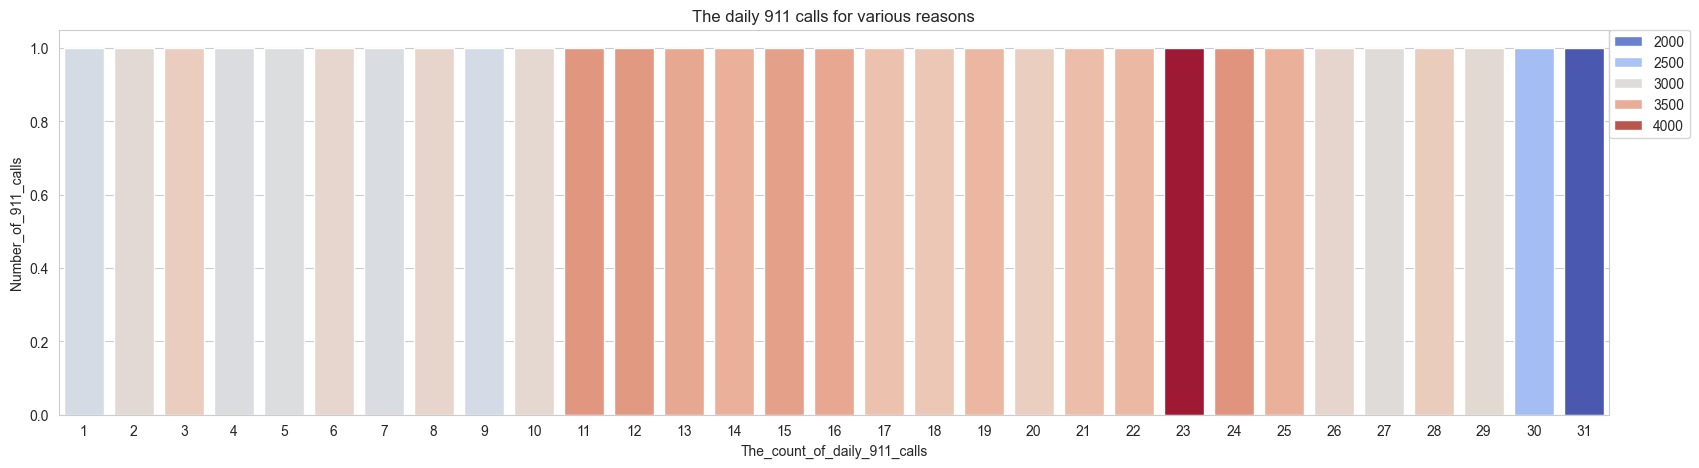

In [108]:
plt.figure(figsize=(20, 5))
sb.countplot(x='day', data=grp_by_day, hue='reason', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('The_count_of_daily_911_calls')
plt.ylabel('Number_of_911_calls')
plt.title('The daily 911 calls for various reasons')
plt.show()

Between the 11th - 22nd day of every month, the 911 calls are very high with higest 911 calls on the 23rd of every month.

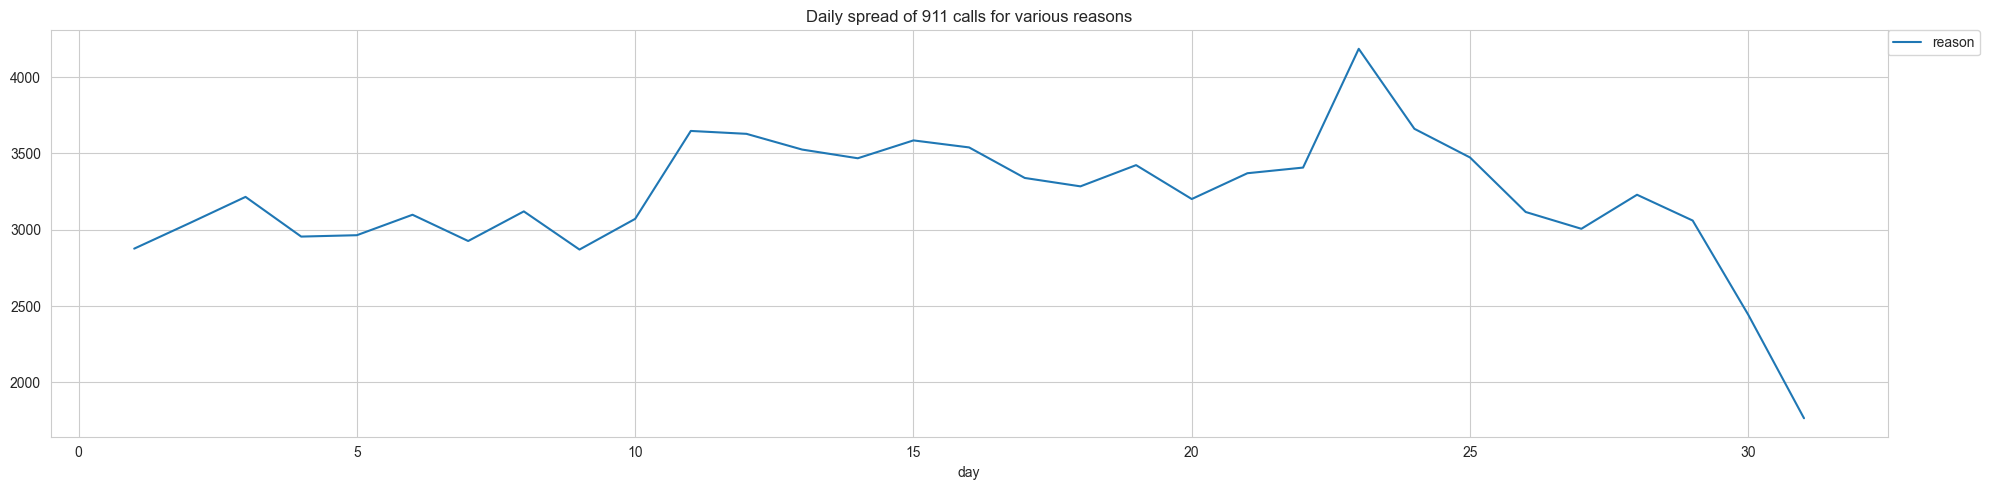

In [109]:
plt.figure(figsize=(20, 5))
grp_by_day['reason'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Daily spread of 911 calls for various reasons')
plt.tight_layout()
plt.show()

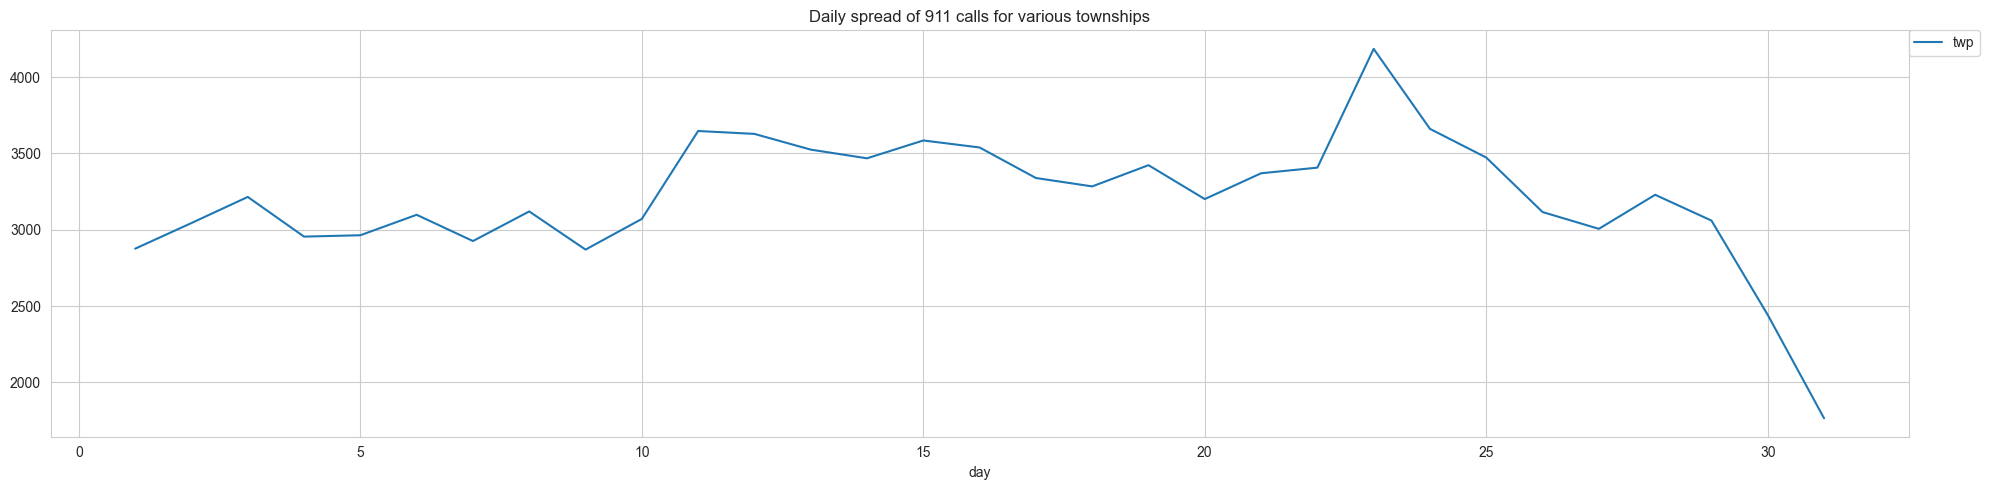

In [110]:
plt.figure(figsize=(20, 5))
grp_by_day['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Daily spread of 911 calls for various townships')
plt.tight_layout()
plt.show()

In [111]:
grp_by_year = df_copy.groupby(df_copy['year']).count()
grp_by_year.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timestamp,hour,dayofweek,month,week_name,month_name,date,day,minutes,second
year,,,,,,,,,,,,,,,,,,,,
2015,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969
2016,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523,91523


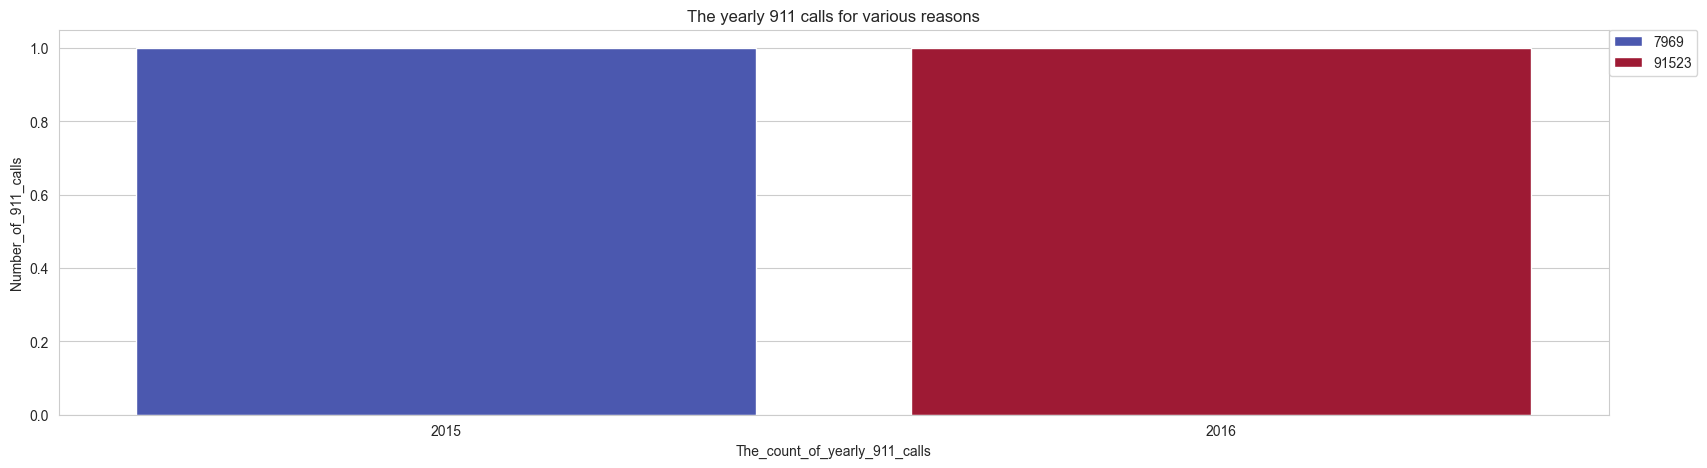

In [112]:
plt.figure(figsize=(20, 5))
sb.countplot(x='year', data=grp_by_year, hue='reason', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('The_count_of_yearly_911_calls')
plt.ylabel('Number_of_911_calls')
plt.title('The yearly 911 calls for various reasons')
plt.show()

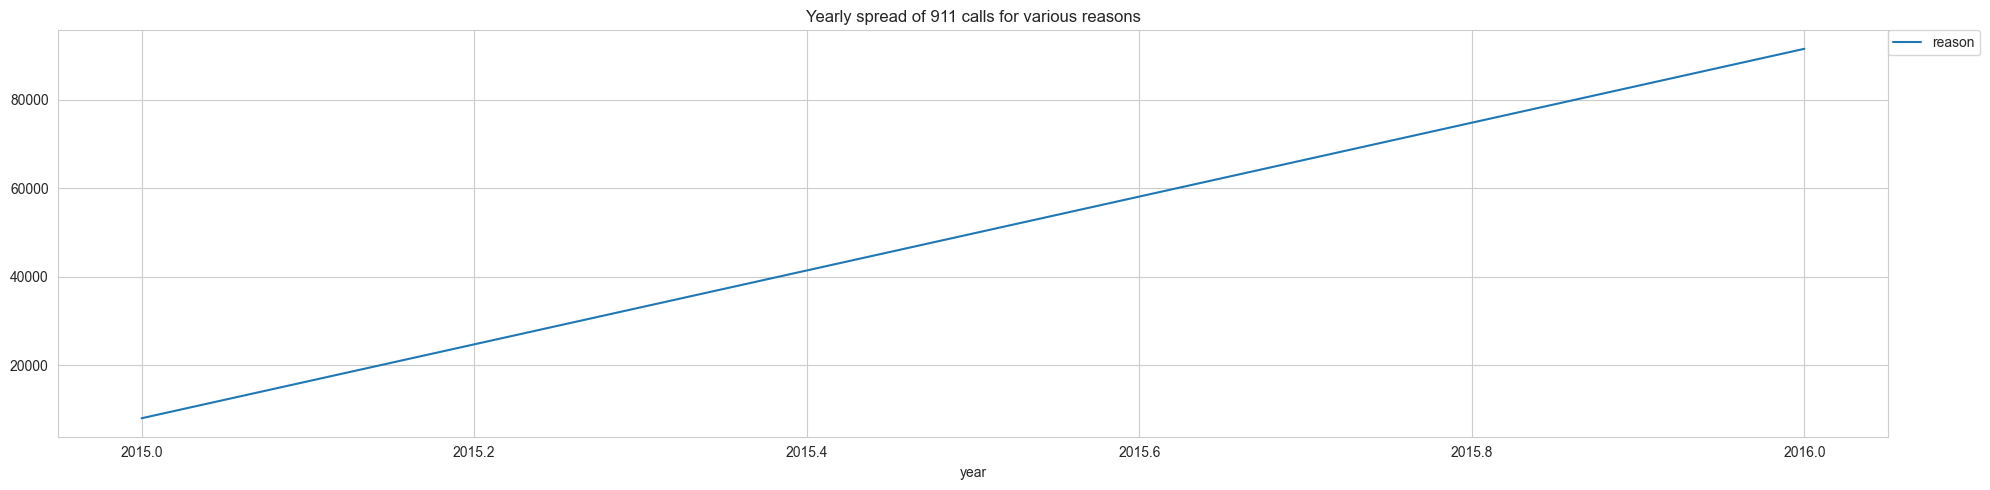

In [113]:
plt.figure(figsize=(20, 5))
grp_by_year['reason'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Yearly spread of 911 calls for various reasons')
plt.tight_layout()
plt.show()

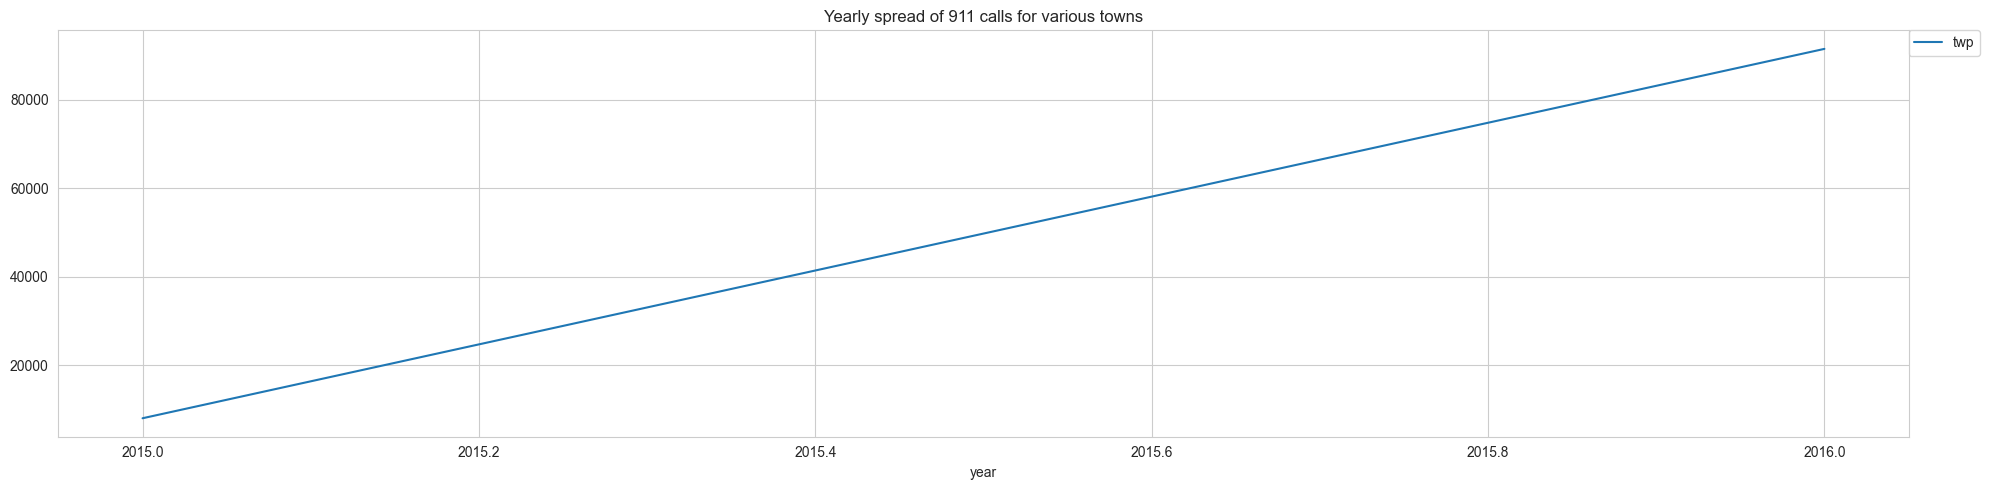

In [114]:
plt.figure(figsize=(20, 5))
grp_by_year['twp'].plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Yearly spread of 911 calls for various towns')
plt.tight_layout()
plt.show()

**Summary**:

 - More 911 calls came on the 23rd day in January, the year 2016.

End of Exploratory Data Analysis

#### <font color = 'purple'> Predictive Analytics - Neural Network and Stochastic Model Development

In [115]:
df = df_copy.copy()

In [116]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,...,hour,dayofweek,month,week_name,month_name,date,year,day,minutes,second
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,...,17,3,12,Wednesday,December,2015-12-10,2015,10,40,0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,...,17,3,12,Wednesday,December,2015-12-10,2015,10,40,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         99492 non-null  float64       
 4   title       99492 non-null  object        
 5   timeStamp   99492 non-null  object        
 6   twp         99492 non-null  object        
 7   addr        99492 non-null  object        
 8   e           99492 non-null  int64         
 9   reason      99492 non-null  object        
 10  timestamp   99492 non-null  datetime64[ns]
 11  hour        99492 non-null  int64         
 12  dayofweek   99492 non-null  int64         
 13  month       99492 non-null  int64         
 14  week_name   99492 non-null  object        
 15  month_name  99492 non-null  object        
 16  date        99492 non-

In [118]:
list(df.columns)

['lat',
 'lng',
 'desc',
 'zip',
 'title',
 'timeStamp',
 'twp',
 'addr',
 'e',
 'reason',
 'timestamp',
 'hour',
 'dayofweek',
 'month',
 'week_name',
 'month_name',
 'date',
 'year',
 'day',
 'minutes',
 'second']

##### Drop Unwanted columns

In [119]:
unwanted_cols = ['desc', 'title', 'timeStamp', 'twp', 'addr', 'e', 'date', 'week_name', 'month_name', 'timestamp']      # 'timestamp'

In [120]:
help(ola.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [121]:
file = df
columns = unwanted_cols
df = ola.dropping_columns(file, columns)

In [122]:
df.head()

,lat,lng,zip,reason,hour,dayofweek,month,year,day,minutes,second
0,40.297876,-75.581294,19525.0,EMS,17,3,12,2015,10,40,0
1,40.258061,-75.264680,19446.0,EMS,17,3,12,2015,10,40,0
2,40.121182,-75.351975,19401.0,Fire,17,3,12,2015,10,40,0
3,40.116153,-75.343513,19401.0,EMS,17,3,12,2015,10,40,1
4,40.251492,-75.603350,19401.0,EMS,17,3,12,2015,10,40,1


In [123]:
df.isnull().sum()

lat          0
lng          0
zip          0
reason       0
hour         0
dayofweek    0
month        0
year         0
day          0
minutes      0
second       0
dtype: int64

In [124]:
df.duplicated().sum()

1046

###### Remove Duplicates

In [125]:
help(ola.duplicate_corrector)

Help on function duplicate_corrector in module olanrewaju:

duplicate_corrector(file)
    This function correct the duplicates entries in the dataset
    Input:
        file: this is the dataset you want to correct the duplicates.
    Output:
        The function returns a dataframe with duplicates completely removed from the dataset, keeping the first entry.



In [126]:
file = df
df = ola.duplicate_corrector(file)

In [127]:
df.duplicated().sum()

0

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98446 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        98446 non-null  float64
 1   lng        98446 non-null  float64
 2   zip        98446 non-null  float64
 3   reason     98446 non-null  object 
 4   hour       98446 non-null  int64  
 5   dayofweek  98446 non-null  int64  
 6   month      98446 non-null  int64  
 7   year       98446 non-null  int64  
 8   day        98446 non-null  int64  
 9   minutes    98446 non-null  int64  
 10  second     98446 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 9.0+ MB


The data types for all columns are correct.

In [129]:
df.shape

(98446, 11)

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,98446.0,40.159769,0.094698,30.333596,40.100664,40.145543,40.229331,41.167156
lng,98446.0,-75.317499,0.175420,-95.595595,-75.393304,-75.304587,-75.212309,-74.995041
zip,98446.0,19257.945158,327.853568,17752.000000,19040.000000,19401.000000,19440.000000,77316.000000
hour,98446.0,13.120472,5.672499,0.000000,9.000000,14.000000,17.000000,23.000000
dayofweek,98446.0,2.887309,1.964068,0.000000,1.000000,3.000000,5.000000,6.000000
month,98446.0,4.983686,3.010962,1.000000,3.000000,5.000000,7.000000,12.000000
year,98446.0,2015.920027,0.271252,2015.000000,2016.000000,2016.000000,2016.000000,2016.000000
day,98446.0,15.932613,8.578980,1.000000,9.000000,16.000000,23.000000,31.000000
minutes,98446.0,29.310343,17.293443,0.000000,12.000000,27.000000,46.000000,59.000000
second,98446.0,0.901083,2.406829,0.000000,0.000000,1.000000,1.000000,59.000000


From the look of things, we would transform the numerical data using `StandardScaler, MinMaxScaler and Normalizer`. Since data problems lies around mean, std, extreme values.

##### Select features and Target

Here, our target is the 'reason' and this gives rise to multiclass classification problems as there exist three labels in the target - `EMS, Fire, Traffic`. We aimed to build a predictive model that can predict what next 911 calls will be, using available inputs.

In [131]:
help(ola.feature_target_selector)

Help on function feature_target_selector in module olanrewaju:

feature_target_selector(file, target_col)
    This function select features and target from a given DataFrame based on the target column specified.
    Inputs:
        file: This is the dataset in pandas dataframe.
        target_col: This is the specified target column name in strings.
    Outputs:
        file: This is the pandas dataframe for all the features selected.
        target: This is the pandas dataframe for the target selected.

    Please note: When calling the function, you will need to specify the name for your features and target and must be the outputs containers.



In [132]:
file = df
target_col = 'reason'
features, target = ola.feature_target_selector(file, target_col)

In [133]:
features.head(2)

,lat,lng,zip,hour,dayofweek,month,year,day,minutes,second
0,40.297876,-75.581294,19525.0,17,3,12,2015,10,40,0
1,40.258061,-75.264680,19446.0,17,3,12,2015,10,40,0


In [134]:
target.head(2)

,reason
0,EMS
1,EMS


In [135]:
target.value_counts()

reason 
EMS        48859
Traffic    34675
Fire       14912
Name: count, dtype: int64

###### Numerical and Categorical Variables selection

##### Numerical data

In [136]:
help(ola.numerical_data)

Help on function numerical_data in module olanrewaju:

numerical_data(file)
    This function select ONLY numerical columns of dtype float and int from a given dataset.
    Input:
        file: This is the pandas dataframe.
    Output:
        This returns a numerical dataframe in the dataset.



In [137]:
file = features
num_data = ola.numerical_data(file)
num_data.head(2)

,lat,lng,zip,hour,dayofweek,month,year,day,minutes,second
0,40.297876,-75.581294,19525.0,17,3,12,2015,10,40,0
1,40.258061,-75.264680,19446.0,17,3,12,2015,10,40,0


###### Transform Numerical data

In [138]:
help(ola.standard_scaler)

Help on function standard_scaler in module olanrewaju:

standard_scaler(file)
    This function transform the numerical columns into standard values with mean 0 and std 1 using the sklearn preprocessing library StandardScaler.
    Input:
        file: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for all numerical columns in the dataset.



In [139]:
file = num_data
num_df = ola.standard_scaler(file)
num_df.head(2)

,lat,lng,zip,hour,dayofweek,month,year,day,minutes,second
0,1.458408,-1.503798,0.814559,0.683922,0.057377,2.330268,-3.391792,-0.691532,0.618137,-0.374388
1,1.037968,0.301105,0.573597,0.683922,0.057377,2.330268,-3.391792,-0.691532,0.618137,-0.374388


###### Categorical Encoding

In [140]:
help(ola.categorical_data)

Help on function categorical_data in module olanrewaju:

categorical_data(file)
    This function select ONLY categorical columns of dtype object from a given dataset.
    Input:
        file: This is the pandas dataframe.
    Output:
        This returns a categorical dataframe in the dataset.



In [141]:
file = features
cat_data = ola.categorical_data(file)
cat_data.head(2)

""
0
1


###### Encode the categorical data using onehot or ordinal encoding

In [142]:
help(ola.one_hot_encoding)

Help on function one_hot_encoding in module olanrewaju:

one_hot_encoding(file)
    This function encodes categorical columns in pandas dataframe using sklearn preprocessing library OneHotEncoder.
    Input:
        file: This is the pandas dataframe containing ONLY categorical columns.
    Output:
        It returns a fully encoded dataframe as zeros and ones for all the categorical columns.



In [143]:
file = cat_data
cat_df = ola.one_hot_encoding(file)
cat_df.head(2)

""
0
1


In [144]:
cat_df = cat_df.reset_index(drop=True)

##### Encode Target Variables

In [145]:
target[['reason']].value_counts()

reason 
EMS        48859
Traffic    34675
Fire       14912
Name: count, dtype: int64

In [146]:
tgt_encoded = target.reset_index(drop=True)
tgt_encoded.head(2)

,reason
0,EMS
1,EMS


##### We need to encode the labels using LabelEncoder

In [147]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(file):
    '''
    This function encodes categorical columns in pandas dataframe using sklearn preprocessing library LabelEncoder.
    Input:
        file: This is the pandas dataframe containing ONLY categorical columns.
    Output:
        It returns a fully encoded dataframe as ordered based on the labels in each columns for all the categorical columns.

    Please note: It is often useful when trying to encode a target columns that has binary or multiclass labels.
    '''
    label = LabelEncoder()
    file_encoded = label.fit_transform(file)
    file_encoded = pd.DataFrame(file_encoded, columns=file.columns)
    return file_encoded

In [148]:
# Call the function
file = tgt_encoded
target_df = label_encoding(file)
target_df = target_df.reset_index(drop=True)
target_df.head()

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,reason
0,0
1,0
2,1
3,0
4,0


In [149]:
target_df.value_counts()

reason
0         48859
2         34675
1         14912
Name: count, dtype: int64

###### Concatenate all

In [150]:
help(ola.concat_df)

Help on function concat_df in module olanrewaju:

concat_df(df)
    This function is used to merge two or more pandas dataframe together to become a new one. It uses the columns to merge.
    The condition to use this function is that, the numbers of rows must be the same for all the dataframes to be merged.
    This function is very useful when trying to concatenate num_data, cat_data and target_data that are splitted from a single dataset during
    transformation and encoding.
    Input:
        df: These are the different pandas dataframes enclosed in a squared bracket, having the same number of rows to be merged.
    Output:
        The function returns a merged pandas dataframe as output.



In [151]:
df = [num_df, cat_df, target_df]
cleaned_df = ola.concat_df(df)

In [152]:
cleaned_df.head(2)

,lat,lng,zip,hour,dayofweek,month,year,day,minutes,second,reason
0,1.458408,-1.503798,0.814559,0.683922,0.057377,2.330268,-3.391792,-0.691532,0.618137,-0.374388,0
1,1.037968,0.301105,0.573597,0.683922,0.057377,2.330268,-3.391792,-0.691532,0.618137,-0.374388,0


In [153]:
round(cleaned_df[['lat', 'lng', 'zip', 'hour', 'dayofweek', 'month', 'year', 'day', 'minutes', 'second']].mean())
round(cleaned_df[['lat', 'lng', 'zip', 'hour', 'dayofweek', 'month', 'year', 'day', 'minutes', 'second']].std())

lat          1.0
lng          1.0
zip          1.0
hour         1.0
dayofweek    1.0
month        1.0
year         1.0
day          1.0
minutes      1.0
second       1.0
dtype: float64

##### <font color = 'purple'> Correct the data imbalance in the target variable

In [246]:
cleaned_df.head(2)

,lat,lng,zip,hour,dayofweek,month,year,day,minutes,second,reason
0,1.458408,-1.503798,0.814559,0.683922,0.057377,2.330268,-3.391792,-0.691532,0.618137,-0.374388,0
1,1.037968,0.301105,0.573597,0.683922,0.057377,2.330268,-3.391792,-0.691532,0.618137,-0.374388,0


In [249]:
feat = cleaned_df.drop('reason', axis=1)
targ = cleaned_df[['reason']]

In [258]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [264]:
smote_enn = SMOTEENN(random_state=seed)
smote_enn

SMOTEENN(random_state=42)

In [265]:
feat_enn, targ_enn = smote_enn.fit_resample(feat, targ)

In [266]:
targ_enn.value_counts()

reason
1         33261
2         17469
0          7376
Name: count, dtype: int64

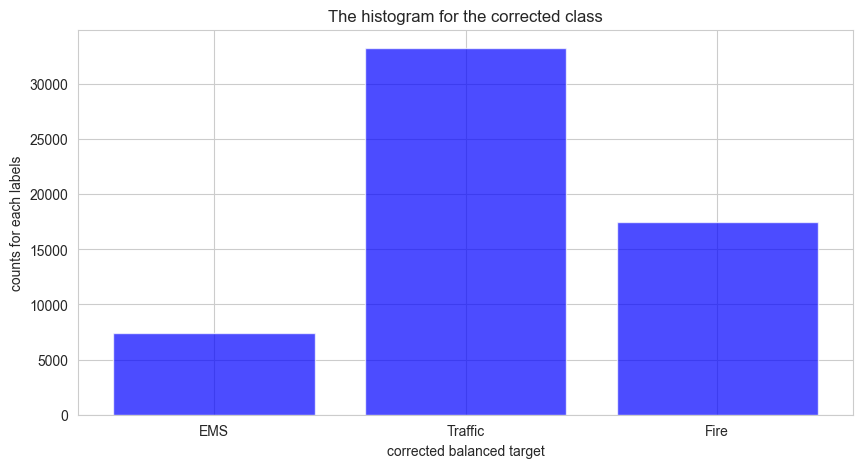

In [268]:
plt.figure(figsize=(10, 5))

plt.hist(targ_enn, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.xlabel('corrected balanced target')
plt.ylabel('counts for each labels')
plt.title('The histogram for the corrected class')
plt.xticks(range(3), ['EMS', 'Traffic', 'Fire'])
plt.show()

###### Concatenate the resampled data

In [269]:
cleaned_df = pd.concat([feat_enn, targ_enn], axis=1)

###### Train_Test_Split the dataset

In [270]:
feat = cleaned_df.drop('reason', axis=1)
targ = cleaned_df[['reason']]

In [271]:
X = feat.values
y = targ.values

In [272]:
print(X.shape)
print(y.shape)

(58106, 10)
(58106, 1)


In [273]:
seed = 42
test_size = 0.1

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [276]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (52295, 10)
X_test: (5811, 10)
y_train: (52295, 1)
y_test: (5811, 1)


#### Build a `fully connected layer` neural network architectures for fitting the model

In [277]:
import tensorflow
from tensorflow import keras

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [278]:
shape = X.shape[1]

model_nn = Sequential()

model_nn.add(Dense(units=64, activation='relu', input_shape=(shape,)))

model_nn.add(Dense(units=3,activation='softmax'))

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###### Compile the model

In [279]:
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### Model Summary

In [280]:
model_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 899 (3.51 KB)

 Trainable params: 899 (3.51 KB)

 Non-trainable params: 0 (0.00 B)

###### Train the model_nn

In [281]:
BATCH_SIZE = 16
EPOCHS = 50

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
tensorboard = TensorBoard(log_dir='./logs')

model_nn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1,  callbacks=[early_stopping, tensorboard])

Epoch 1/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6523 - loss: 0.7998 - val_accuracy: 0.7136 - val_loss: 0.6977
Epoch 2/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7186 - loss: 0.6778 - val_accuracy: 0.7150 - val_loss: 0.6915
Epoch 3/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7220 - loss: 0.6746 - val_accuracy: 0.7210 - val_loss: 0.6863
Epoch 4/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7251 - loss: 0.6683 - val_accuracy: 0.7259 - val_loss: 0.6805
Epoch 5/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7232 - loss: 0.6695 - val_accuracy: 0.7264 - val_loss: 0.6816
Epoch 6/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7263 - loss: 0.6635 - val_accuracy: 0.7138 - val_loss: 0.6839
Epoch 7/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7281 - loss: 0.6630 - val_accuracy: 0.7298 - val_loss: 0.6755
Epoch 8/50
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7253 - loss: 0.6623 -

##### Evaluate the model

In [283]:
loss, accuracy = model_nn.evaluate(X_test, y_test)
print('Test accuracy:', round(accuracy, 2))
print(' ')
print('Test loss:', round(loss, 2))

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7362 - loss: 0.6427
Test accuracy: 0.74
 
Test loss: 0.64


###### Predict the Test Class

In [284]:
pred_prob = model_nn.predict(X_test)
pred_prob

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02709665, 0.04015052, 0.93275285],
       [0.06110589, 0.24679424, 0.69209987],
       [0.00143133, 0.0028083 , 0.9957604 ],
       ...,
       [0.05812087, 0.8737809 , 0.06809826],
       [0.07254767, 0.58240324, 0.3450491 ],
       [0.02892297, 0.51234925, 0.45872778]], dtype=float32)

In [285]:
predicted_classes = np.argmax(pred_prob, axis=1)
predicted_classes

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [286]:
predicted_classes[2]

2

###### Confusion Matrix

In [287]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predicted_classes)
conf_mat

array([[ 120,  530,  106],
       [ 100, 2836,  356],
       [  16,  409, 1338]], dtype=int64)

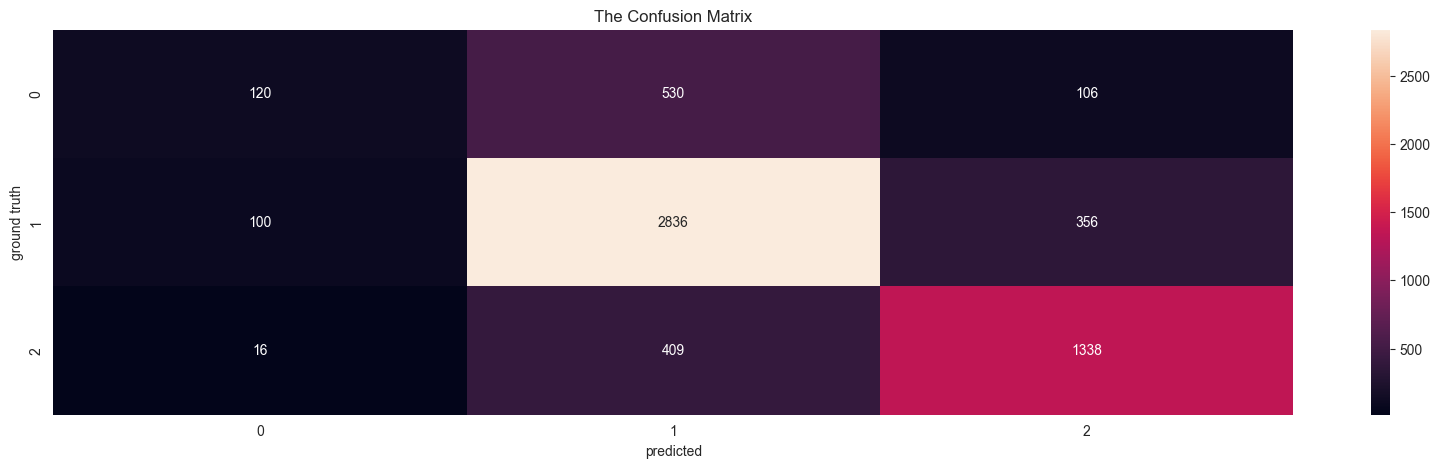

In [288]:
plt.figure(figsize=(20, 5))

sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The Confusion Matrix')
plt.show()

#### Train Logistic Regression and RandomForestClassifier for the same problem and compare performance

Logistic regression can be used for `multiclass classification problems` by using the `one-vs-all` (also known as `one-vs-rest`) approach. In this approach, each class is treated as a separate binary classification problem, where the class of interest is treated as the positive class and all other classes are treated as the negative class.

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

##### Train_Test_Split outputs

In [310]:
(X_train[0], X_test[0], y_train[0], y_test[0])

(array([-0.55126879,  0.08382399,  0.62239944, -0.19752807, -1.47007305,
        -1.32306772,  0.29482937,  0.2409841 , -0.19142282, -0.37438779]),
 array([-0.11769923,  0.05630011,  0.50039314,  0.68392209,  1.5848265 ,
        -1.32306772,  0.29482937, -1.50748445,  1.31204486,  0.4565853 ]),
 array([1]),
 array([2]))

###### Logistic Regression Model

In [311]:
num_iter = 1000
log_reg = LogisticRegression(max_iter=num_iter)
log_reg

LogisticRegression(max_iter=1000)

In [312]:
model_OVR = OneVsRestClassifier(log_reg)
model_OVR

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [313]:
model_OVR.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

###### Make the Predictions

In [314]:
y_pred = model_OVR.predict(X_test)
y_pred

array([2, 1, 2, ..., 1, 1, 1])

In [315]:
y_pred_df = pd.DataFrame(y_pred, columns=['reason'])
y_pred_df.head()

,reason
0,2
1,1
2,2
3,2
4,1


###### Evaluate the model performance

In [316]:
score = model_OVR.score(X_test, y_test)
print(f'Test accuracy: {score:.3f}')

Test accuracy: 0.678


###### Confusion Matrix

In [317]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[   0,  739,   17],
       [   0, 3215,   77],
       [   0, 1039,  724]], dtype=int64)

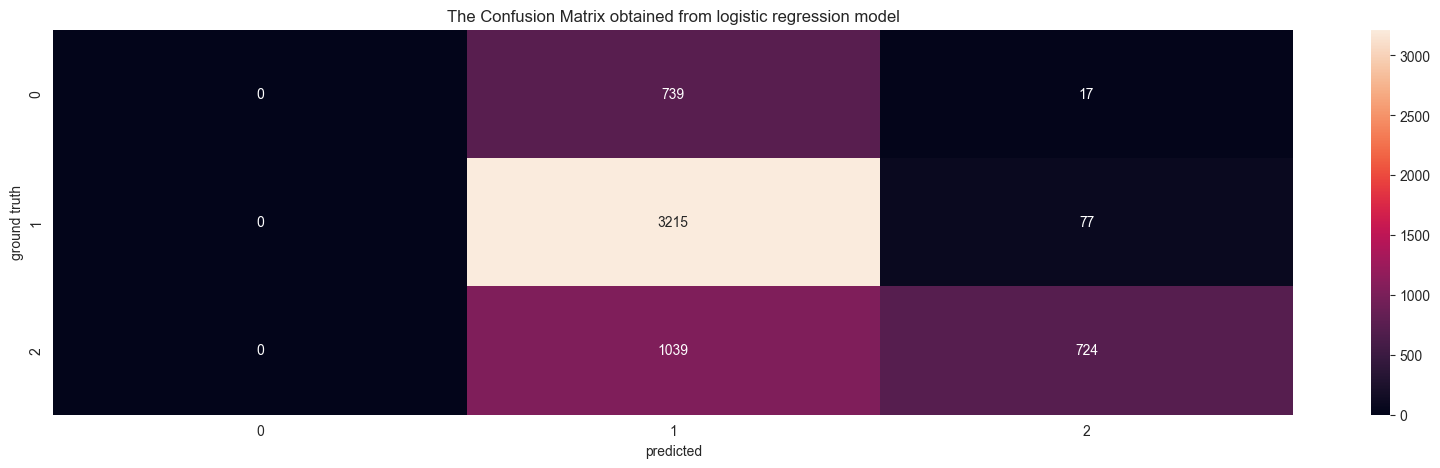

In [318]:
plt.figure(figsize=(20, 5))

sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The Confusion Matrix obtained from logistic regression model')
plt.show()

###### RandomForestClassifier Model

In [319]:
from sklearn.ensemble import RandomForestClassifier
num_estimators = 100
seed = 42
rf_model = RandomForestClassifier(n_estimators=num_estimators, random_state=seed)
rf_model

RandomForestClassifier(random_state=42)

###### Wrapping the oneVsRestClassifier into the model instance

In [320]:
model_OVR = OneVsRestClassifier(rf_model)
model_OVR

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

###### Train the model

In [321]:
model_OVR.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

##### Make the Predictions

In [322]:
y_pred = model_OVR.predict(X_test)
y_pred

array([2, 2, 2, ..., 1, 2, 2])

In [323]:
y_pred_df = pd.DataFrame(y_pred, columns=['reason'])
y_pred_df.head()

,reason
0,2
1,2
2,2
3,2
4,0


###### Evaluate the model

In [324]:
score = model_OVR.score(X_test, y_test)
print(f'Test accuracy: {score:.3f}')

Test accuracy: 0.863


###### Confusion Matrix

In [325]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 351,  295,  110],
       [  50, 3120,  122],
       [  21,  197, 1545]], dtype=int64)

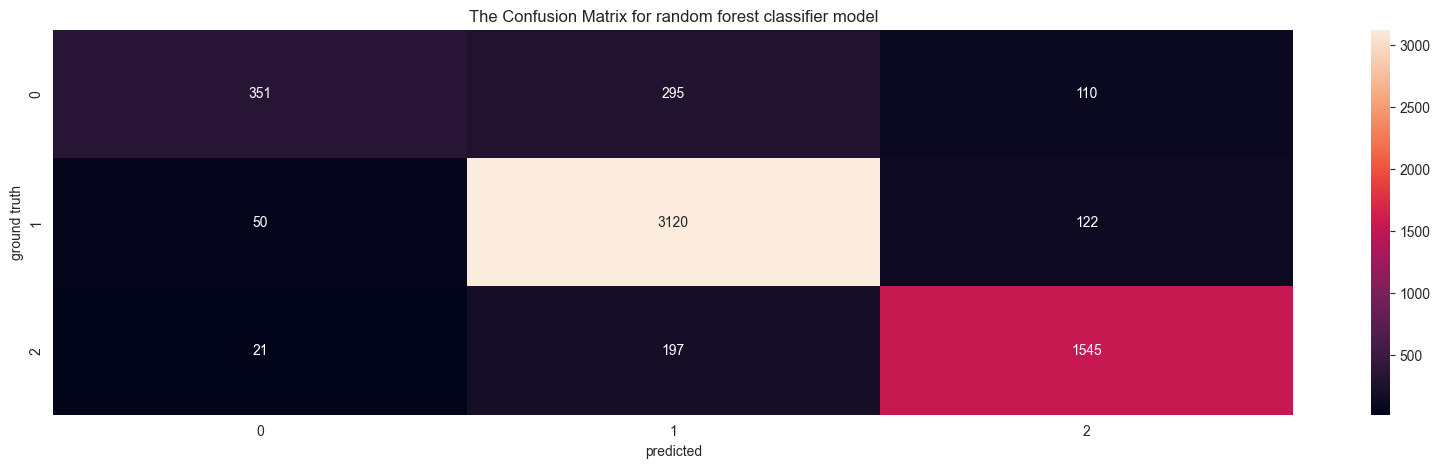

In [326]:
plt.figure(figsize=(20, 5))

sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The Confusion Matrix for random forest classifier model')
plt.show()